In [1]:
import pandas as pd
import requests
import json
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# Reemplaza 'archivo.csv' con la ubicación y el nombre de tu archivo CSV
archivo_csv = 'datasets/datos_crudos.csv'

# Carga el archivo CSV en un DataFrame
datos_crudos = pd.read_csv(archivo_csv)

# Ahora 'df' es un DataFrame que contiene los datos del archivo CSV
datos_crudos

País   Año  Birth rate, crude (per 1,000 people)  \
0     Argentina  1990                             87.956000   
1     Argentina  1991                             87.376000   
2     Argentina  1992                             86.732000   
3     Argentina  1993                             86.280000   
4     Argentina  1994                             85.676000   
...         ...   ...                                   ...   
2371    Uruguay  2020                             41.356000   
2372    Uruguay  2020                             41.356000   
2373    Uruguay  2020                             41.356000   
2374    Uruguay  2021                             52.365000   
2375    Uruguay  2022                             53.966159   

      CO2 emissions (kg per PPP $ of GDP)  \
0                                1.711437   
1                                1.601483   
2                                1.478251   
3                                1.363379   
4                                1.280178   
...                                   ...   
2371                             0.325995   
2372                             0.325995   
2373                             0.325995   
2374                             0.564661   
2375                             0.549410   

      Capital health expenditure (% of GDP)  \
0                                  0.814852   
1                                  0.818599   
2                                  0.822346   
3                                  0.826094   
4                                  0.829841   
...                                     ...   
2371                               0.619265   
2372                               0.619265   
2373                               0.619265   
2374                               0.931018   
2375                               0.934765   

      Compulsory education, duration (years)  Control of Corruption: Estimate  \
0                                  29.446281                        -1.030008   
1                                  29.836042                        -1.057853   
2                                  30.225802                        -1.085698   
3                                  30.615563                        -1.113543   
4                                  31.005324                        -1.141387   
...                                      ...                              ...   
2371                               56.000000                        -1.865352   
2372                               56.000000                        -1.865352   
2373                               56.000000                        -1.865352   
2374                               70.000000                        -1.893197   
2375                               70.000000                        -1.921042   

      Current health expenditure per capita, PPP (current international $)  \
0                                            504.107276                      
1                                            618.349578                      
2                                            732.591880                      
3                                            846.834182                      
4                                            961.076484                      
...                                                 ...                      
2371                                        3931.376335                      
2372                                        3931.376335                      
2373                                        3931.376335                      
2374                                        4045.618637                      
2375                                        4159.860939                      

      Death rate, crude (per 1,000 people)  \
0                                30.972000   
1                                30.144000   
2                                30.380000   
3                                30.524000   
4       

In [3]:
# Reemplaza 'archivo.csv' con la ubicación y el nombre de tu archivo CSV
archivo2_csv = 'datasets/correlaciones_top.csv'

# Carga el archivo CSV en un DataFrame
df_correlaciones = pd.read_csv(archivo2_csv)

# Ahora 'df' es un DataFrame que contiene los datos del archivo CSV
df_correlaciones

País                                        Indicadores  \
0    Argentina               Death rate, crude (per 1,000 people)   
1    Argentina             Prevalence of overweight (% of adults)   
2    Argentina             Compulsory education, duration (years)   
3    Argentina                                         Gini index   
4    Argentina  People using at least basic sanitation service...   
..         ...                                                ...   
325    Uruguay  Unemployment, total (% of total labor force) (...   
326    Uruguay  PM2.5 air pollution, population exposed to lev...   
327    Uruguay  Domestic private health expenditure (% of curr...   
328    Uruguay     Mortality rate, infant (per 1,000 live births)   
329    Uruguay                                         Gini index   

     Correlaciones  
0         0.950772  
1         0.849348  
2         0.830000  
3         0.798245  
4         0.755316  
..             ...  
325       0.615488  
326       0.610463  
327       0.578541  
328       0.573091  
329       0.509200  

[330 rows x 3 columns]

In [5]:
df_crudos_argentina = datos_crudos[datos_crudos['País'] == 'Argentina']
df_crudos_argentina

País   Año  Birth rate, crude (per 1,000 people)  \
0   Argentina  1990                             87.956000   
1   Argentina  1991                             87.376000   
2   Argentina  1992                             86.732000   
3   Argentina  1993                             86.280000   
4   Argentina  1994                             85.676000   
5   Argentina  1995                             83.896000   
6   Argentina  1996                             61.347000   
7   Argentina  1997                             59.955000   
8   Argentina  1998                             59.214000   
9   Argentina  1999                             59.022000   
10  Argentina  2000                             58.098000   
11  Argentina  2001                             56.949000   
12  Argentina  2002                             75.024000   
13  Argentina  2003                             73.812000   
14  Argentina  2004                             73.408000   
15  Argentina  2005                             91.765000   
16  Argentina  2006                             90.970000   
17  Argentina  2007                             90.025000   
18  Argentina  2008                             71.248000   
19  Argentina  2009                             71.396000   
20  Argentina  2010                             71.480000   
21  Argentina  2011                             71.224000   
22  Argentina  2012                             70.916000   
23  Argentina  2013                             70.528000   
24  Argentina  2014                             87.520000   
25  Argentina  2015                             86.730000   
26  Argentina  2016                             84.120000   
27  Argentina  2017                             64.824000   
28  Argentina  2018                             75.935000   
29  Argentina  2019                             73.915000   
30  Argentina  2020                             56.500000   
31  Argentina  2021                             55.608000   
32  Argentina  2022                             53.966159   

    CO2 emissions (kg per PPP $ of GDP)  \
0                              1.711437   
1                              1.601483   
2                              1.478251   
3                              1.363379   
4                              1.280178   
5                              1.301870   
6                              0.986377   
7                              0.923056   
8                              0.924598   
9                              0.956730   
10                             0.927295   
11                             0.898408   
12                             1.241347   
13                             1.215525   
14                             1.202428   
15                             1.382569   
16                             1.317155   
17                             1.236536   
18                             0.958041   
19                             0.947301   
20                             0.907853   
21                             0.886239   
22                             0.868395   
23                             0.862770   
24                             1.069183   
25                             1.069851   
26                             1.034529   
27                             0.689934   
28                             0.853360   
29                             0.813208   
30                             0.655309   
31                             0.564661   
32                             0.549410   

    Capital health expenditure (% of GDP)  \
0                                0.814852   
1                                0.818599   
2                                0.822346   
3                                0.826094   
4                                0.829841   
5                                0.833588   
6                                0.837336   
7                                0.841083   
8                                0.844830   
9                    

In [6]:
df_correlaciones_argentina = df_correlaciones[df_correlaciones['País'] == 'Argentina']
df_correlaciones_argentina

País                                        Indicadores  \
0   Argentina               Death rate, crude (per 1,000 people)   
1   Argentina             Prevalence of overweight (% of adults)   
2   Argentina             Compulsory education, duration (years)   
3   Argentina                                         Gini index   
4   Argentina  People using at least basic sanitation service...   
5   Argentina  Government expenditure on education, total (% ...   
6   Argentina  Domestic general government health expenditure...   
7   Argentina           GDP, PPP (constant 2017 international $)   
8   Argentina               Population ages 80 and above, female   
9   Argentina  Mortality rate, adult, male (per 1,000 male ad...   
10  Argentina               Birth rate, crude (per 1,000 people)   
11  Argentina                                   Urban population   
12  Argentina           Fertility rate, total (births per woman)   
13  Argentina  Proportion of adults who are obese, 20 years o...   
14  Argentina                 Population ages 80 and above, male   

    Correlaciones  
0        0.950772  
1        0.849348  
2        0.830000  
3        0.798245  
4        0.755316  
5        0.745943  
6        0.732966  
7        0.680451  
8        0.670411  
9        0.663628  
10       0.659834  
11       0.609529  
12       0.608389  
13       0.562548  
14       0.542900

In [7]:
columnas_coincidentes = df_crudos_argentina.columns[df_crudos_argentina.columns.isin(df_correlaciones_argentina['Indicadores'])]

# Crea un nuevo DataFrame con las columnas coincidentes.
df1_coincidentes = df_crudos_argentina[columnas_coincidentes]
df1_coincidentes

Birth rate, crude (per 1,000 people)  \
0                              87.956000   
1                              87.376000   
2                              86.732000   
3                              86.280000   
4                              85.676000   
5                              83.896000   
6                              61.347000   
7                              59.955000   
8                              59.214000   
9                              59.022000   
10                             58.098000   
11                             56.949000   
12                             75.024000   
13                             73.812000   
14                             73.408000   
15                             91.765000   
16                             90.970000   
17                             90.025000   
18                             71.248000   
19                             71.396000   
20                             71.480000   
21                             71.224000   
22                             70.916000   
23                             70.528000   
24                             87.520000   
25                             86.730000   
26                             84.120000   
27                             64.824000   
28                             75.935000   
29                             73.915000   
30                             56.500000   
31                             55.608000   
32                             53.966159   

    Compulsory education, duration (years)  \
0                                29.446281   
1                                29.836042   
2                                30.225802   
3                                30.615563   
4                                31.005324   
5                                31.395084   
6                                31.784845   
7                                32.174605   
8                                30.000000   
9                                30.000000   
10                               30.000000   
11                               30.000000   
12                               40.000000   
13                               40.000000   
14                               40.000000   
15                               50.000000   
16                               65.000000   
17                               65.000000   
18                               52.000000   
19                               52.000000   
20                               52.000000   
21                               52.000000   
22                               52.000000   
23                               52.000000   
24                               65.000000   
25                               70.000000   
26                               70.000000   
27                               56.000000   
28                               70.000000   
29                               70.000000   
30                               56.000000   
31                               56.000000   
32                               56.000000   

    Death rate, crude (per 1,000 people)  \
0                              30.972000   
1                              30.144000   
2                              30.380000   
3                              30.524000   
4                              29.612000   
5                              30.140000   
6                              22.623000   
7                              23.334000   
8                              22.953000   
9                              22.845000   
10                             22.800000   
11                             22.647000   
12                             30.072000   
13                             31.456000   
14                             29.920000   
15                             37.115000   
16                             36.845000   
17                             38.740000   
18                             29.868000   
19                             29.640000   
20                

C:\Users\haide\AppData\Local\Temp\ipykernel_28108\970383409.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_28108\970383409.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_28108\970383409.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_28108\970383409.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)


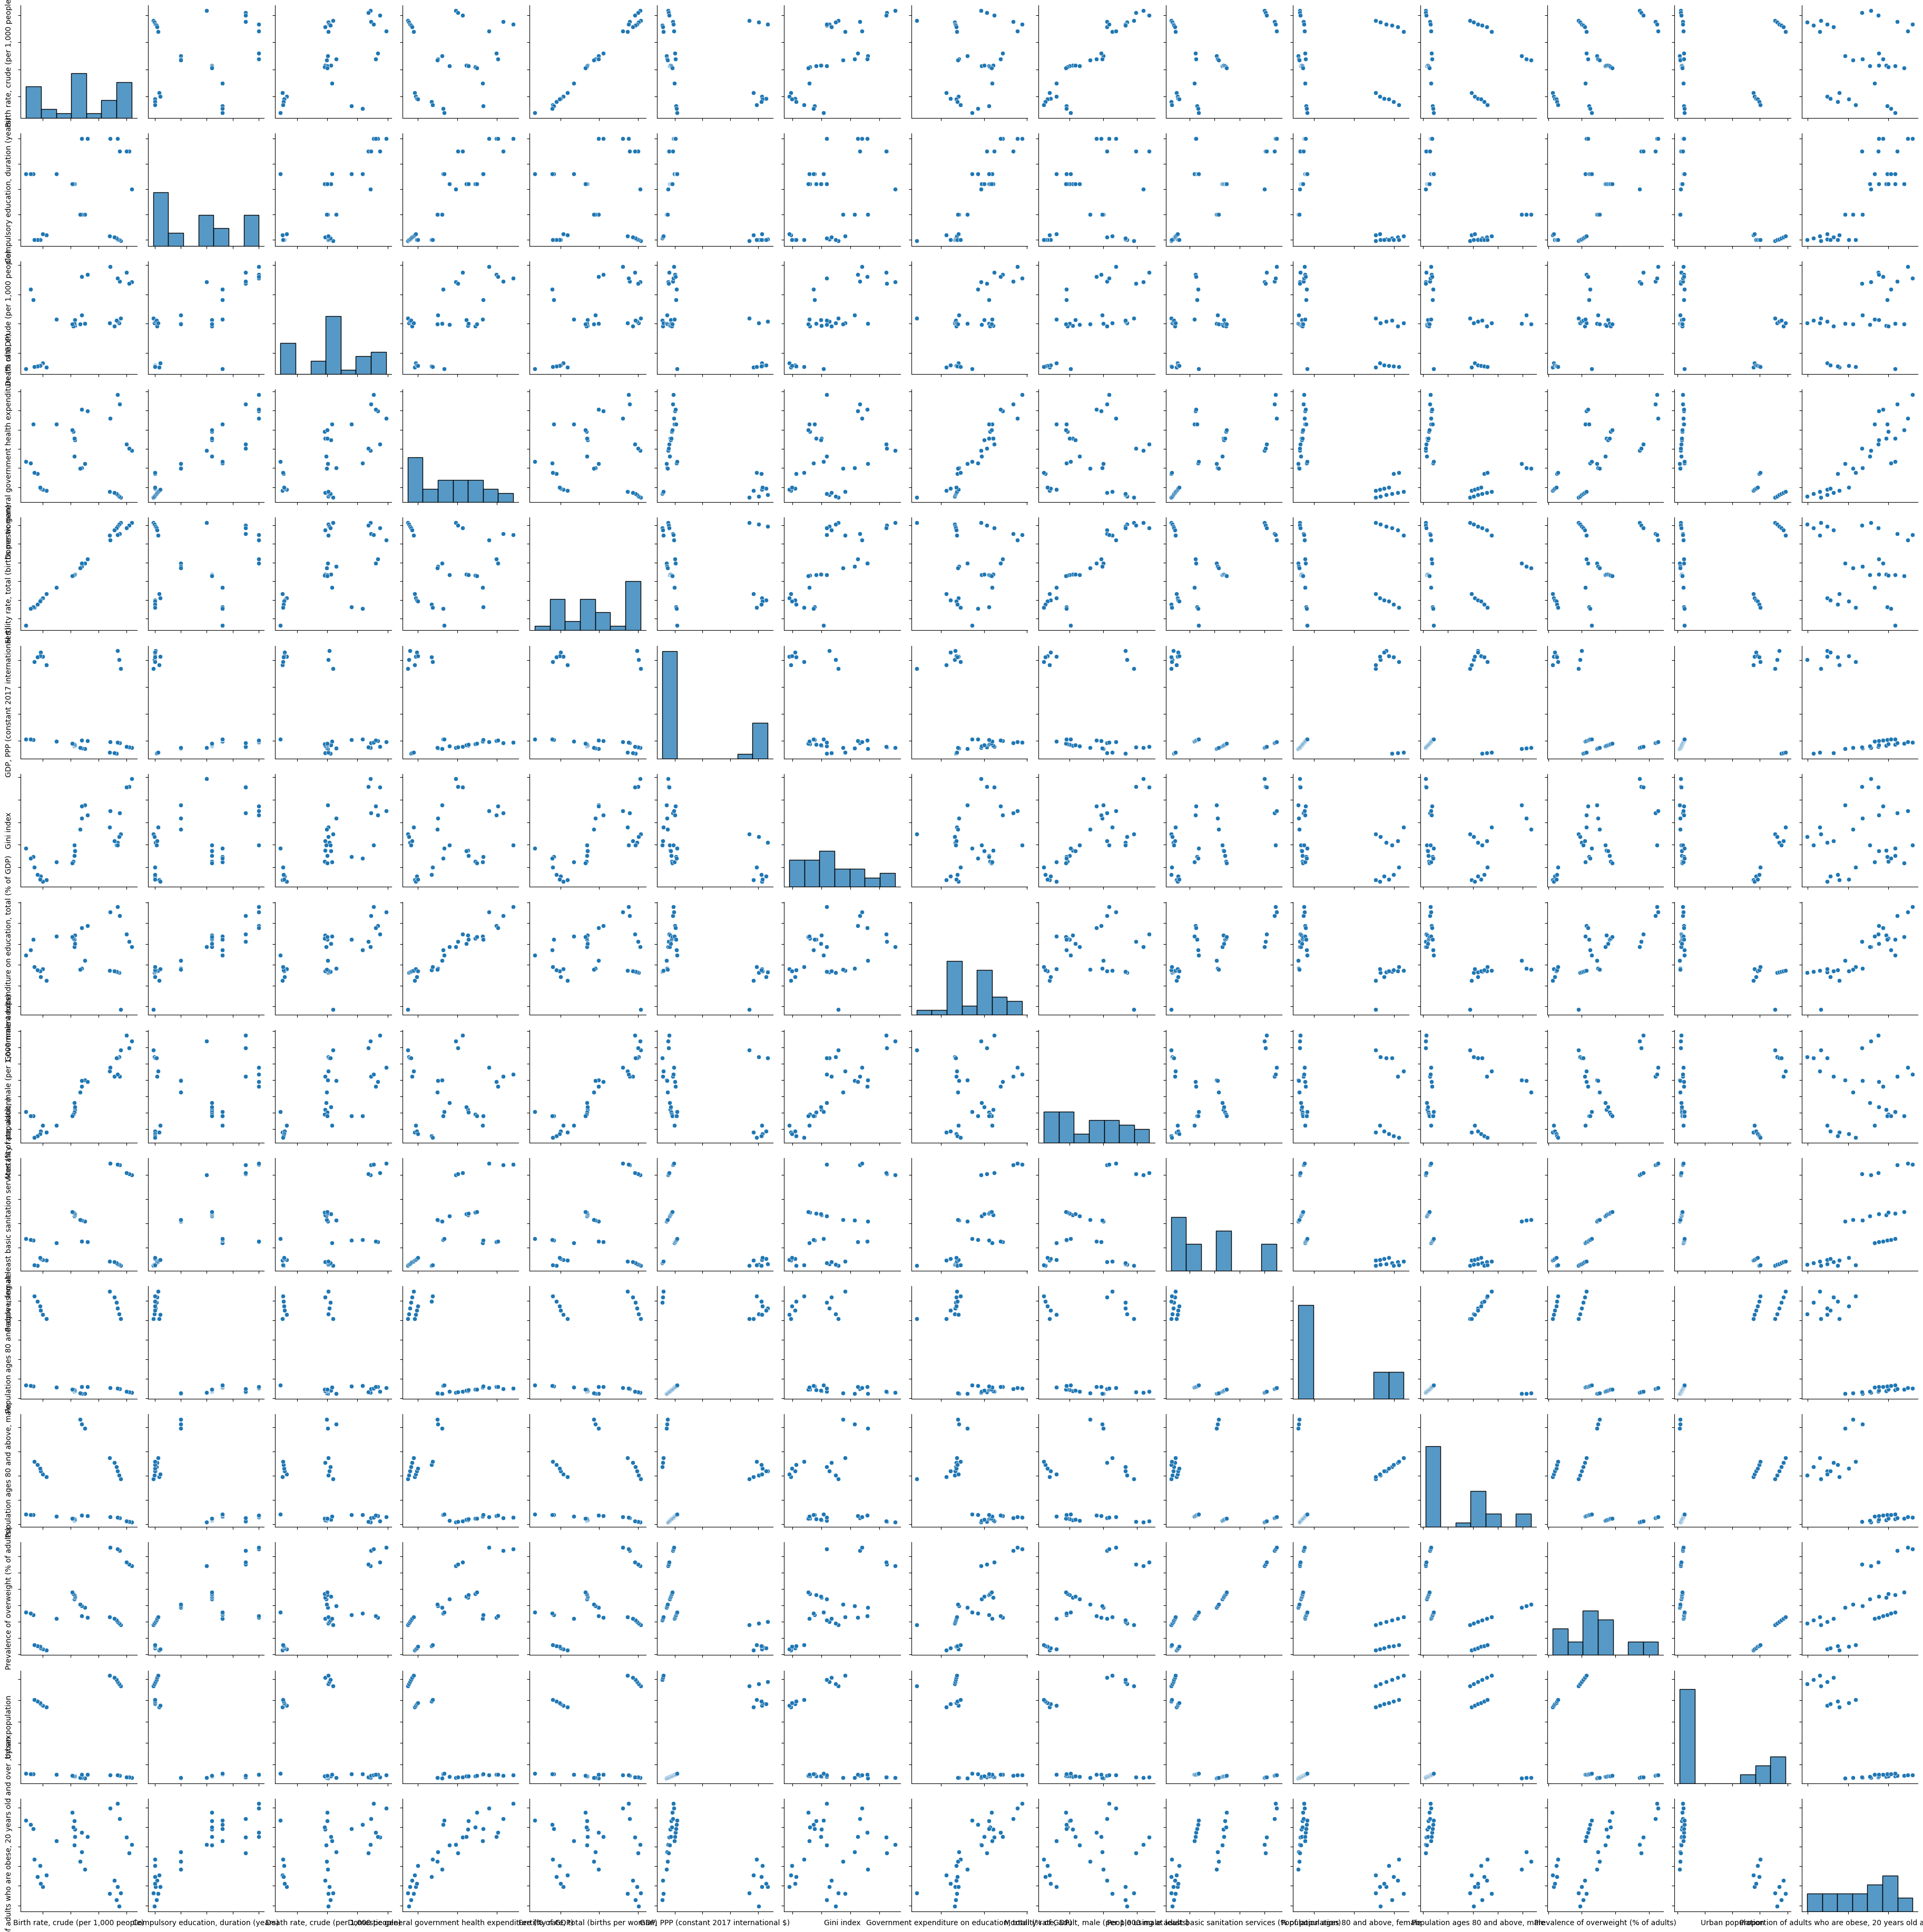

<Figure size 2000x2000 with 0 Axes>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

pair_plot = sns.pairplot(df1_coincidentes)

# Aumentar el tamaño del gráfico
plt.figure(figsize=(20, 20))

# Personalizar las leyendas de los ejes y ajustar el espacio entre subplots
for ax in pair_plot.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()  # Mostrar el gráfico

Birth rate vs fertility rate <br>
Birth rate vs Mortality rate, adult, male (per 1,000 male ad...<br>
Domestic general government health expenditure... vs Proportion of adults who are obese, 20 years o... <br>
Domestic general government health expenditure... vs Government expenditure on education, total (% ...

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

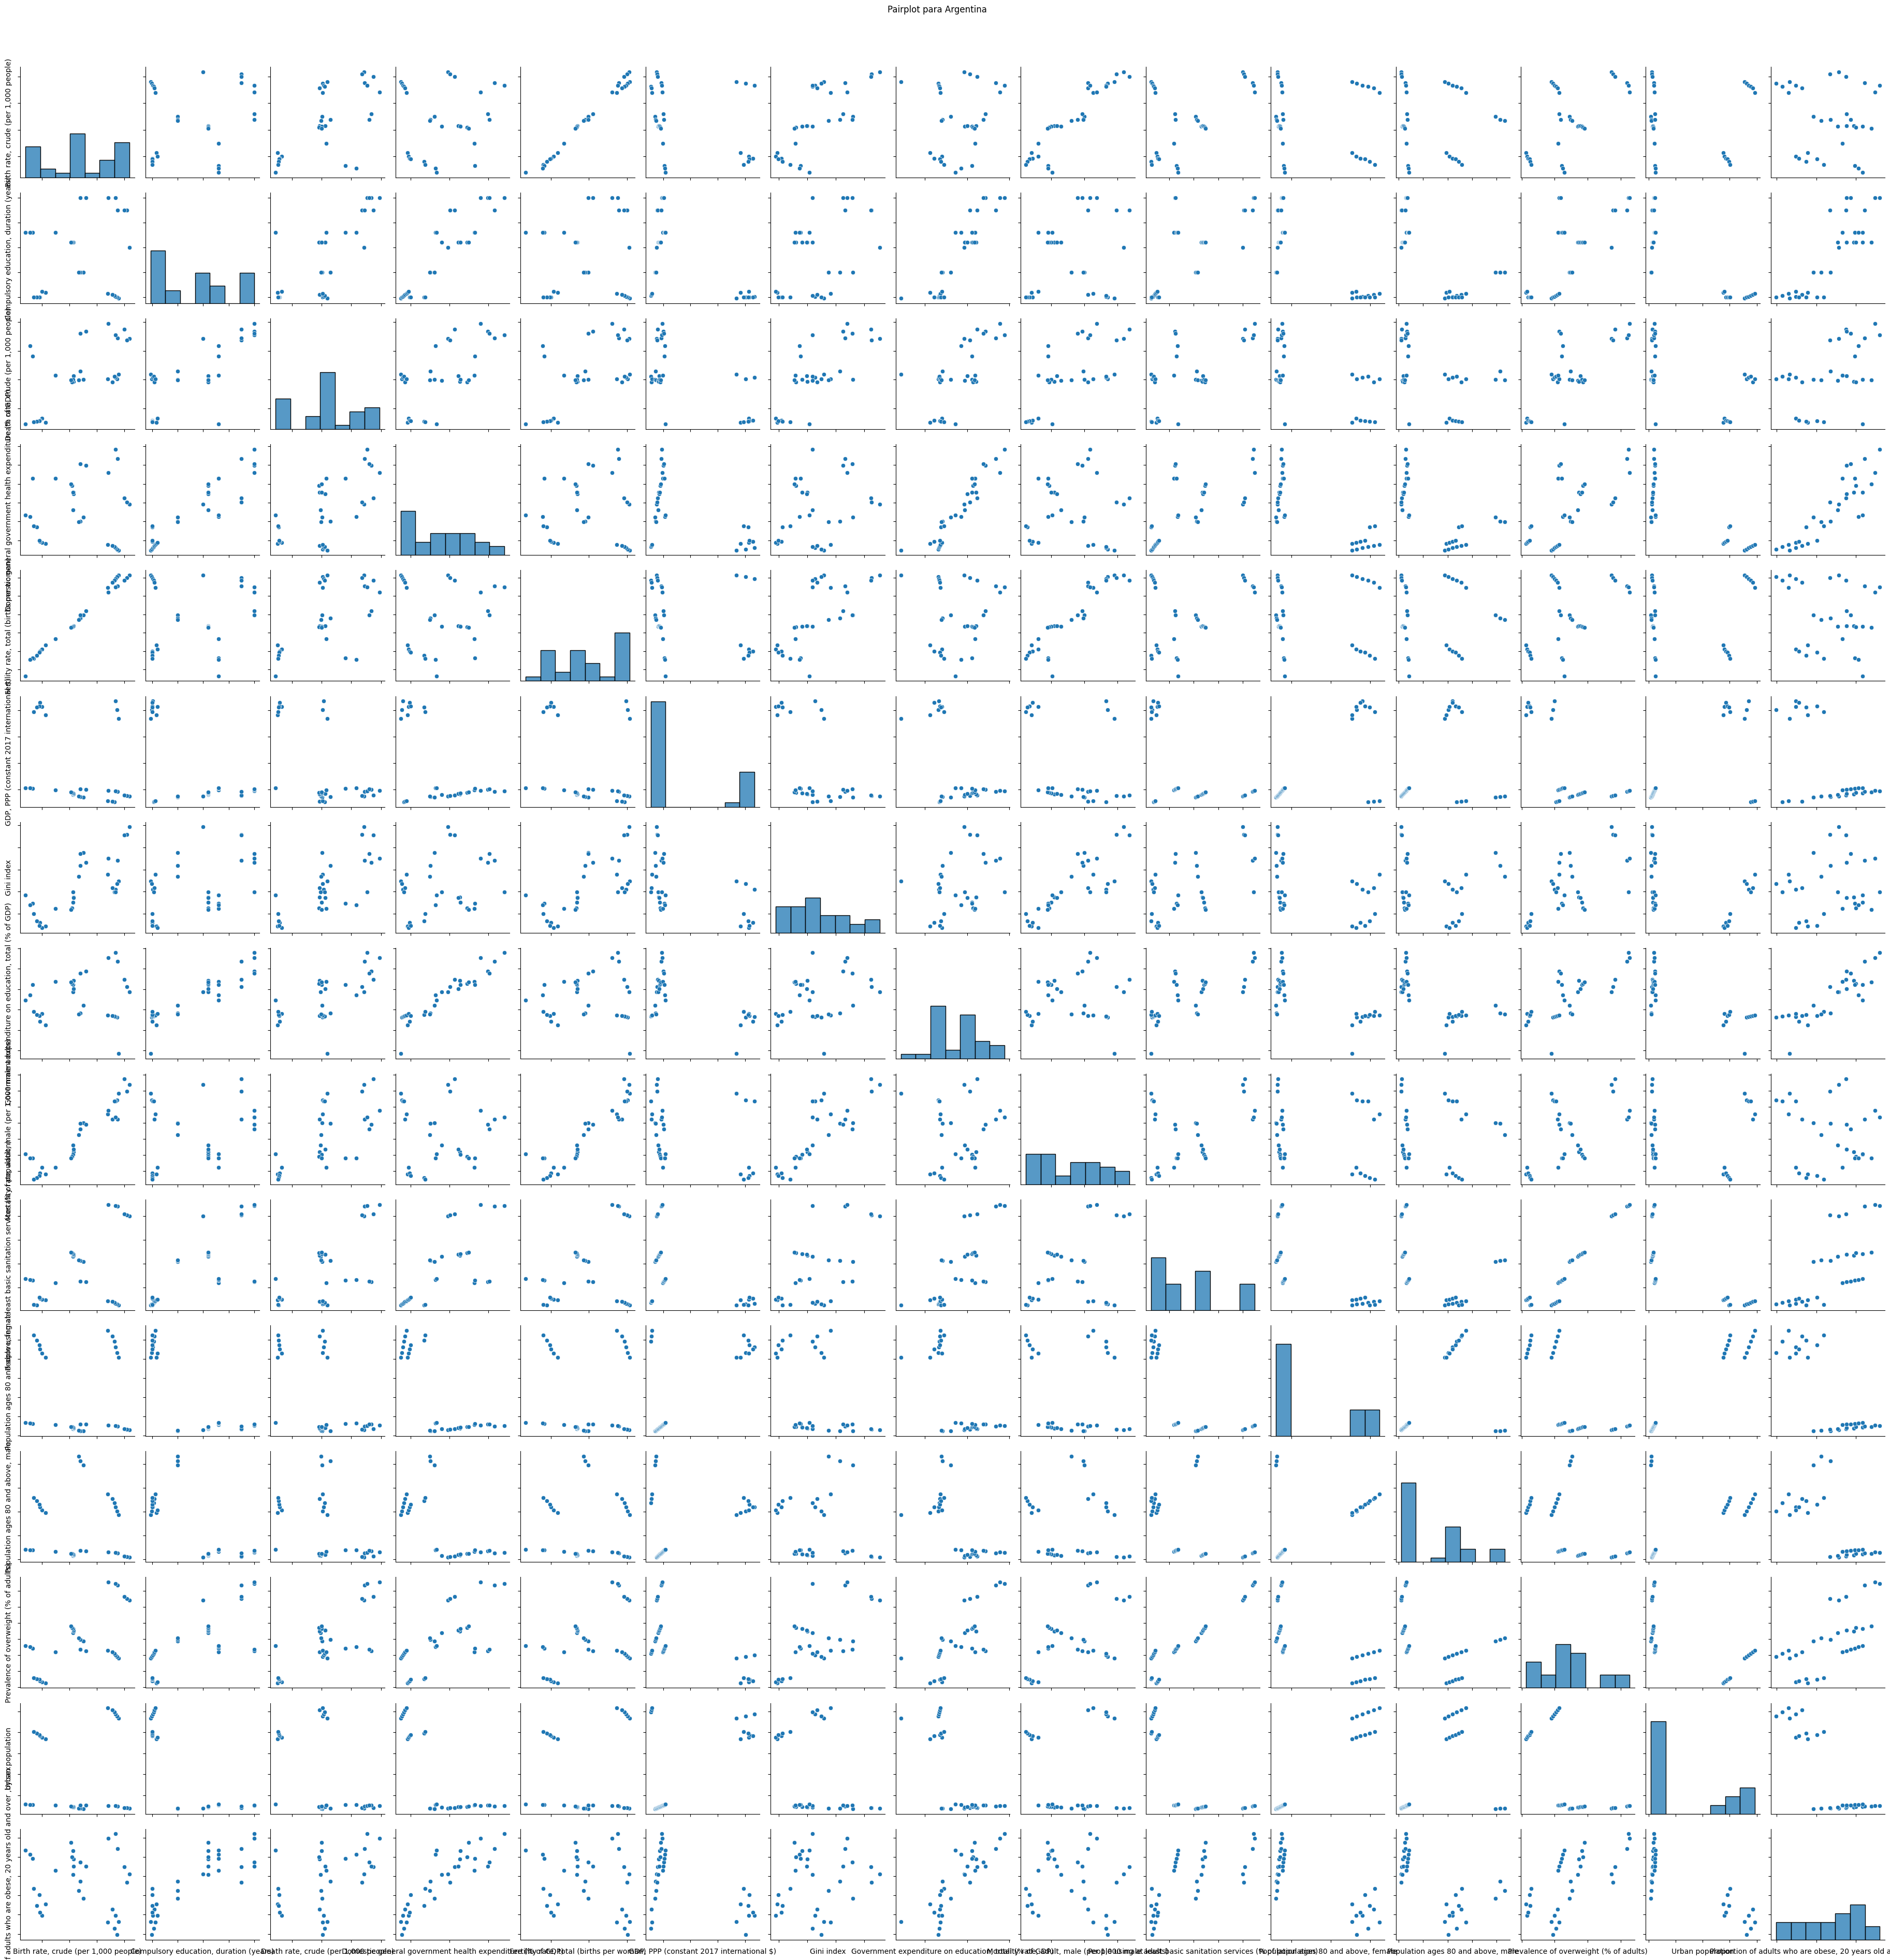

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

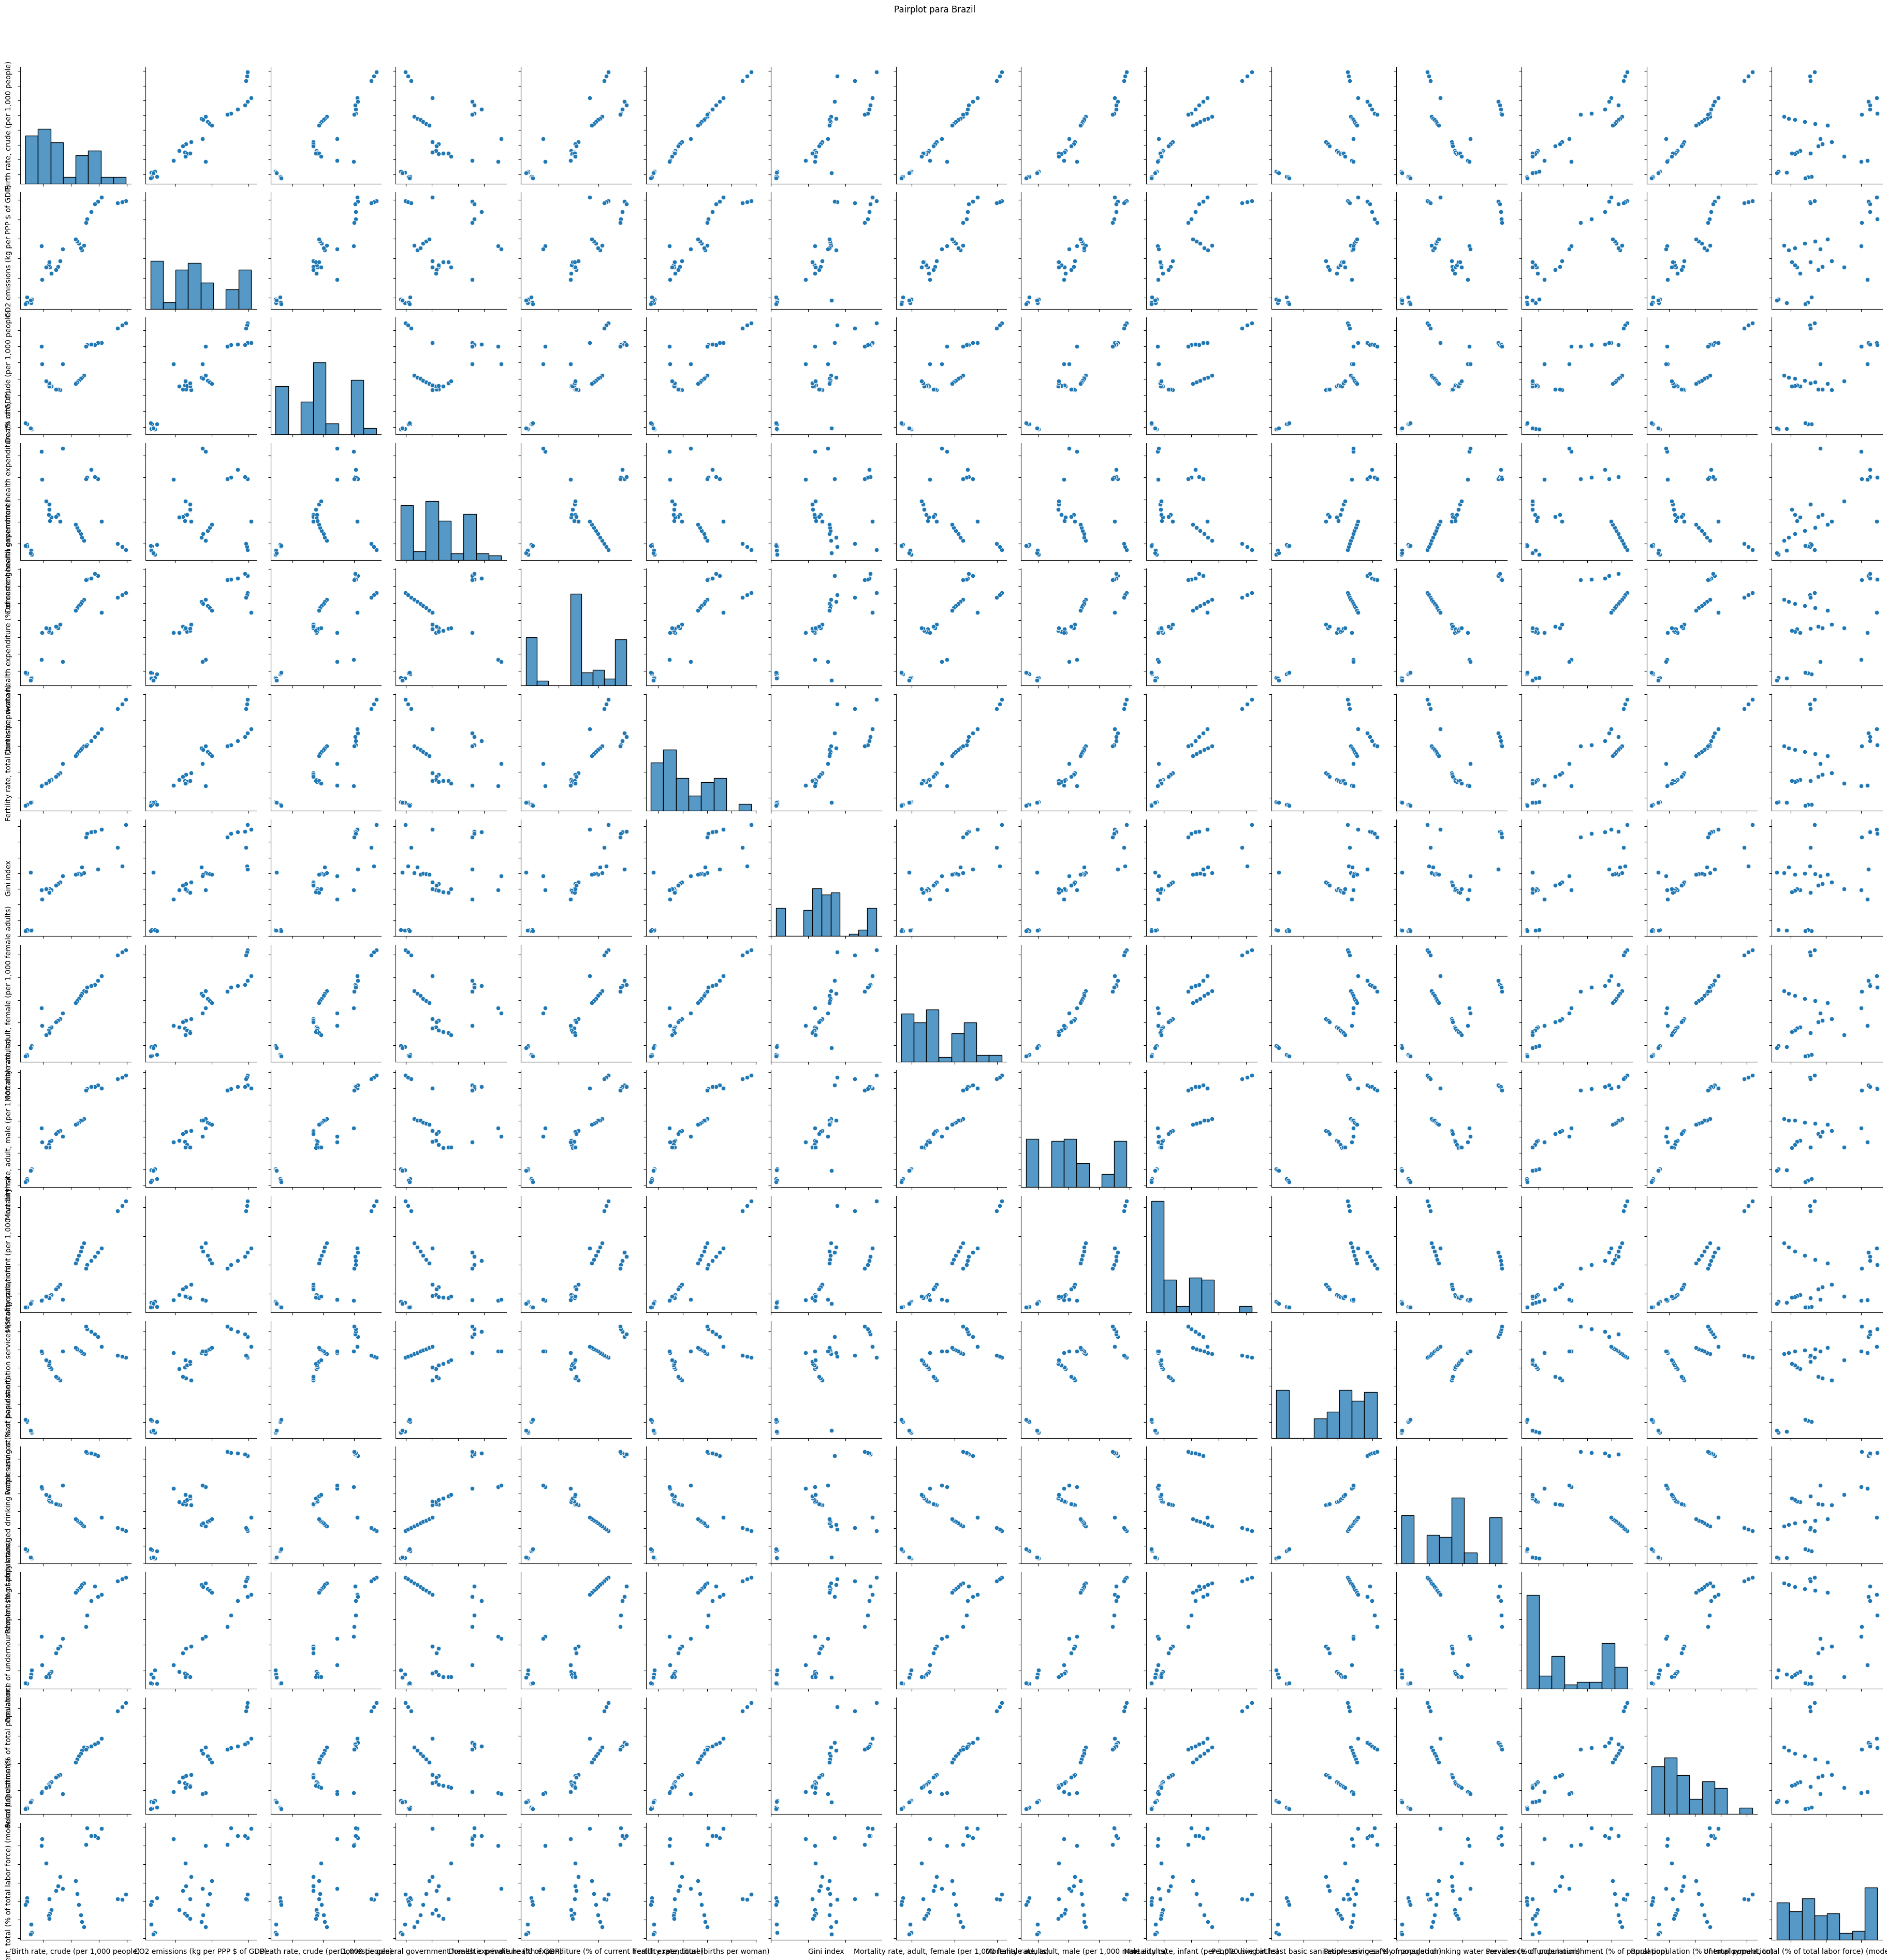

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

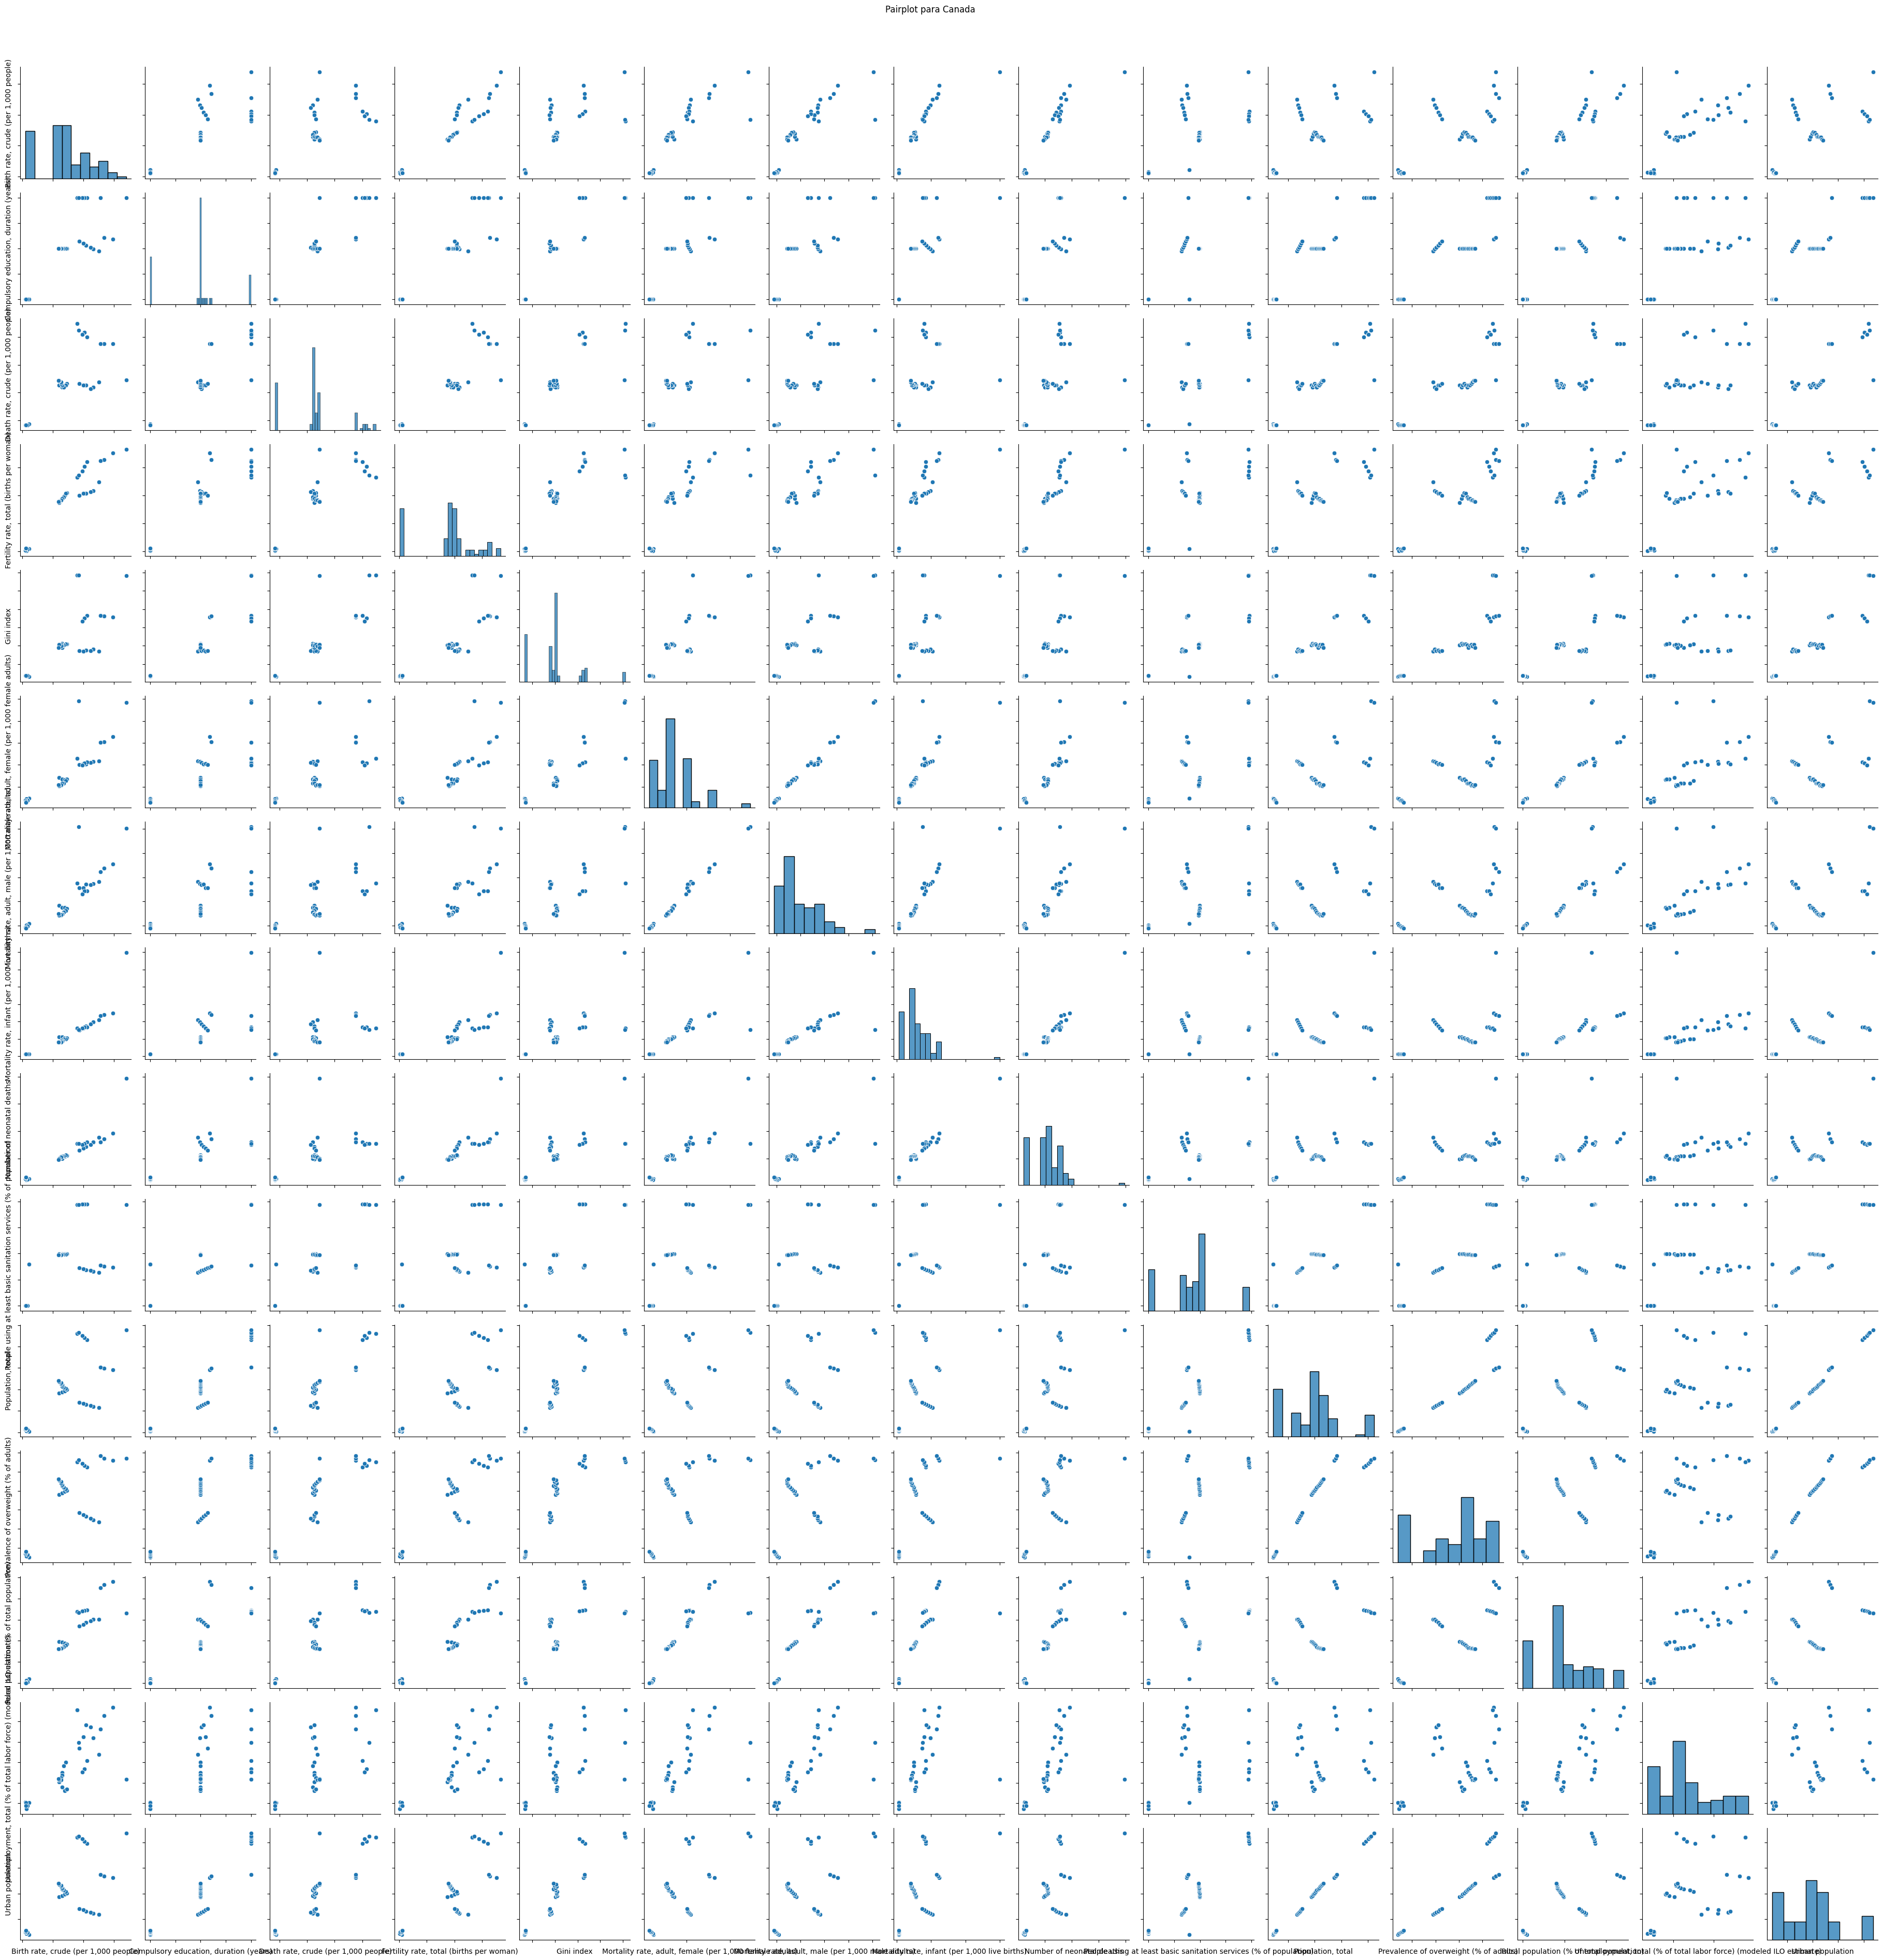

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

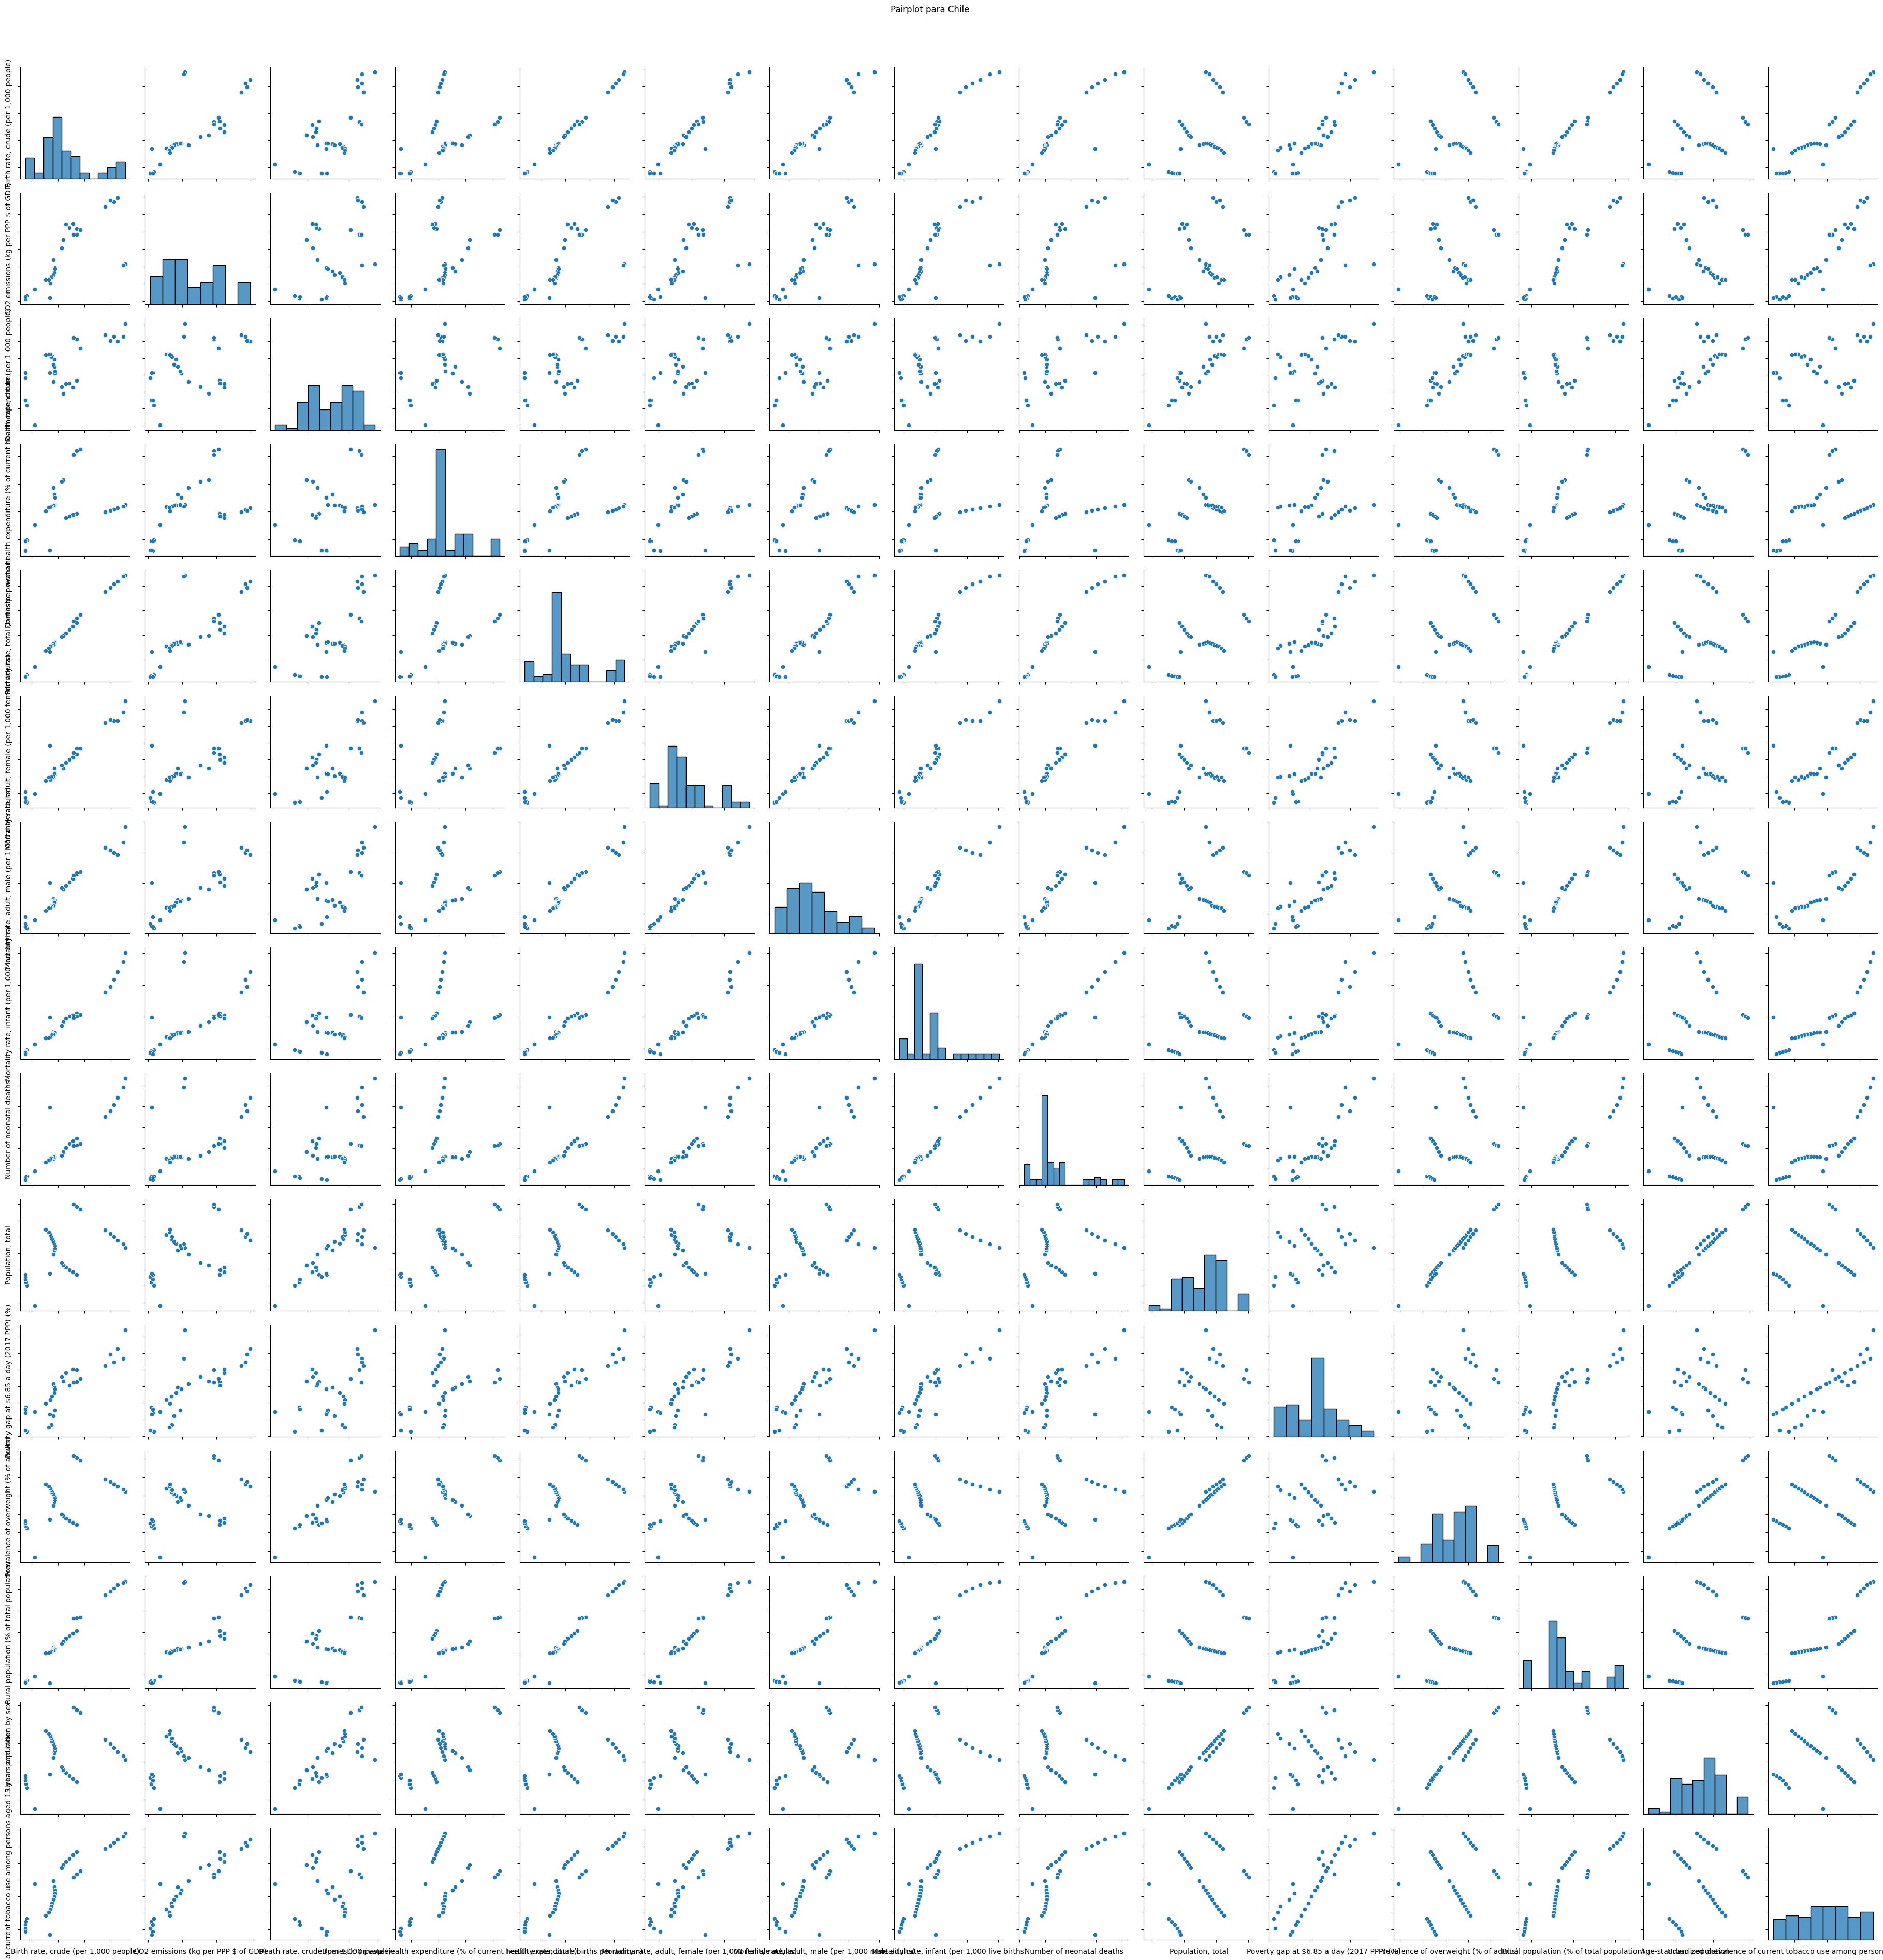

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

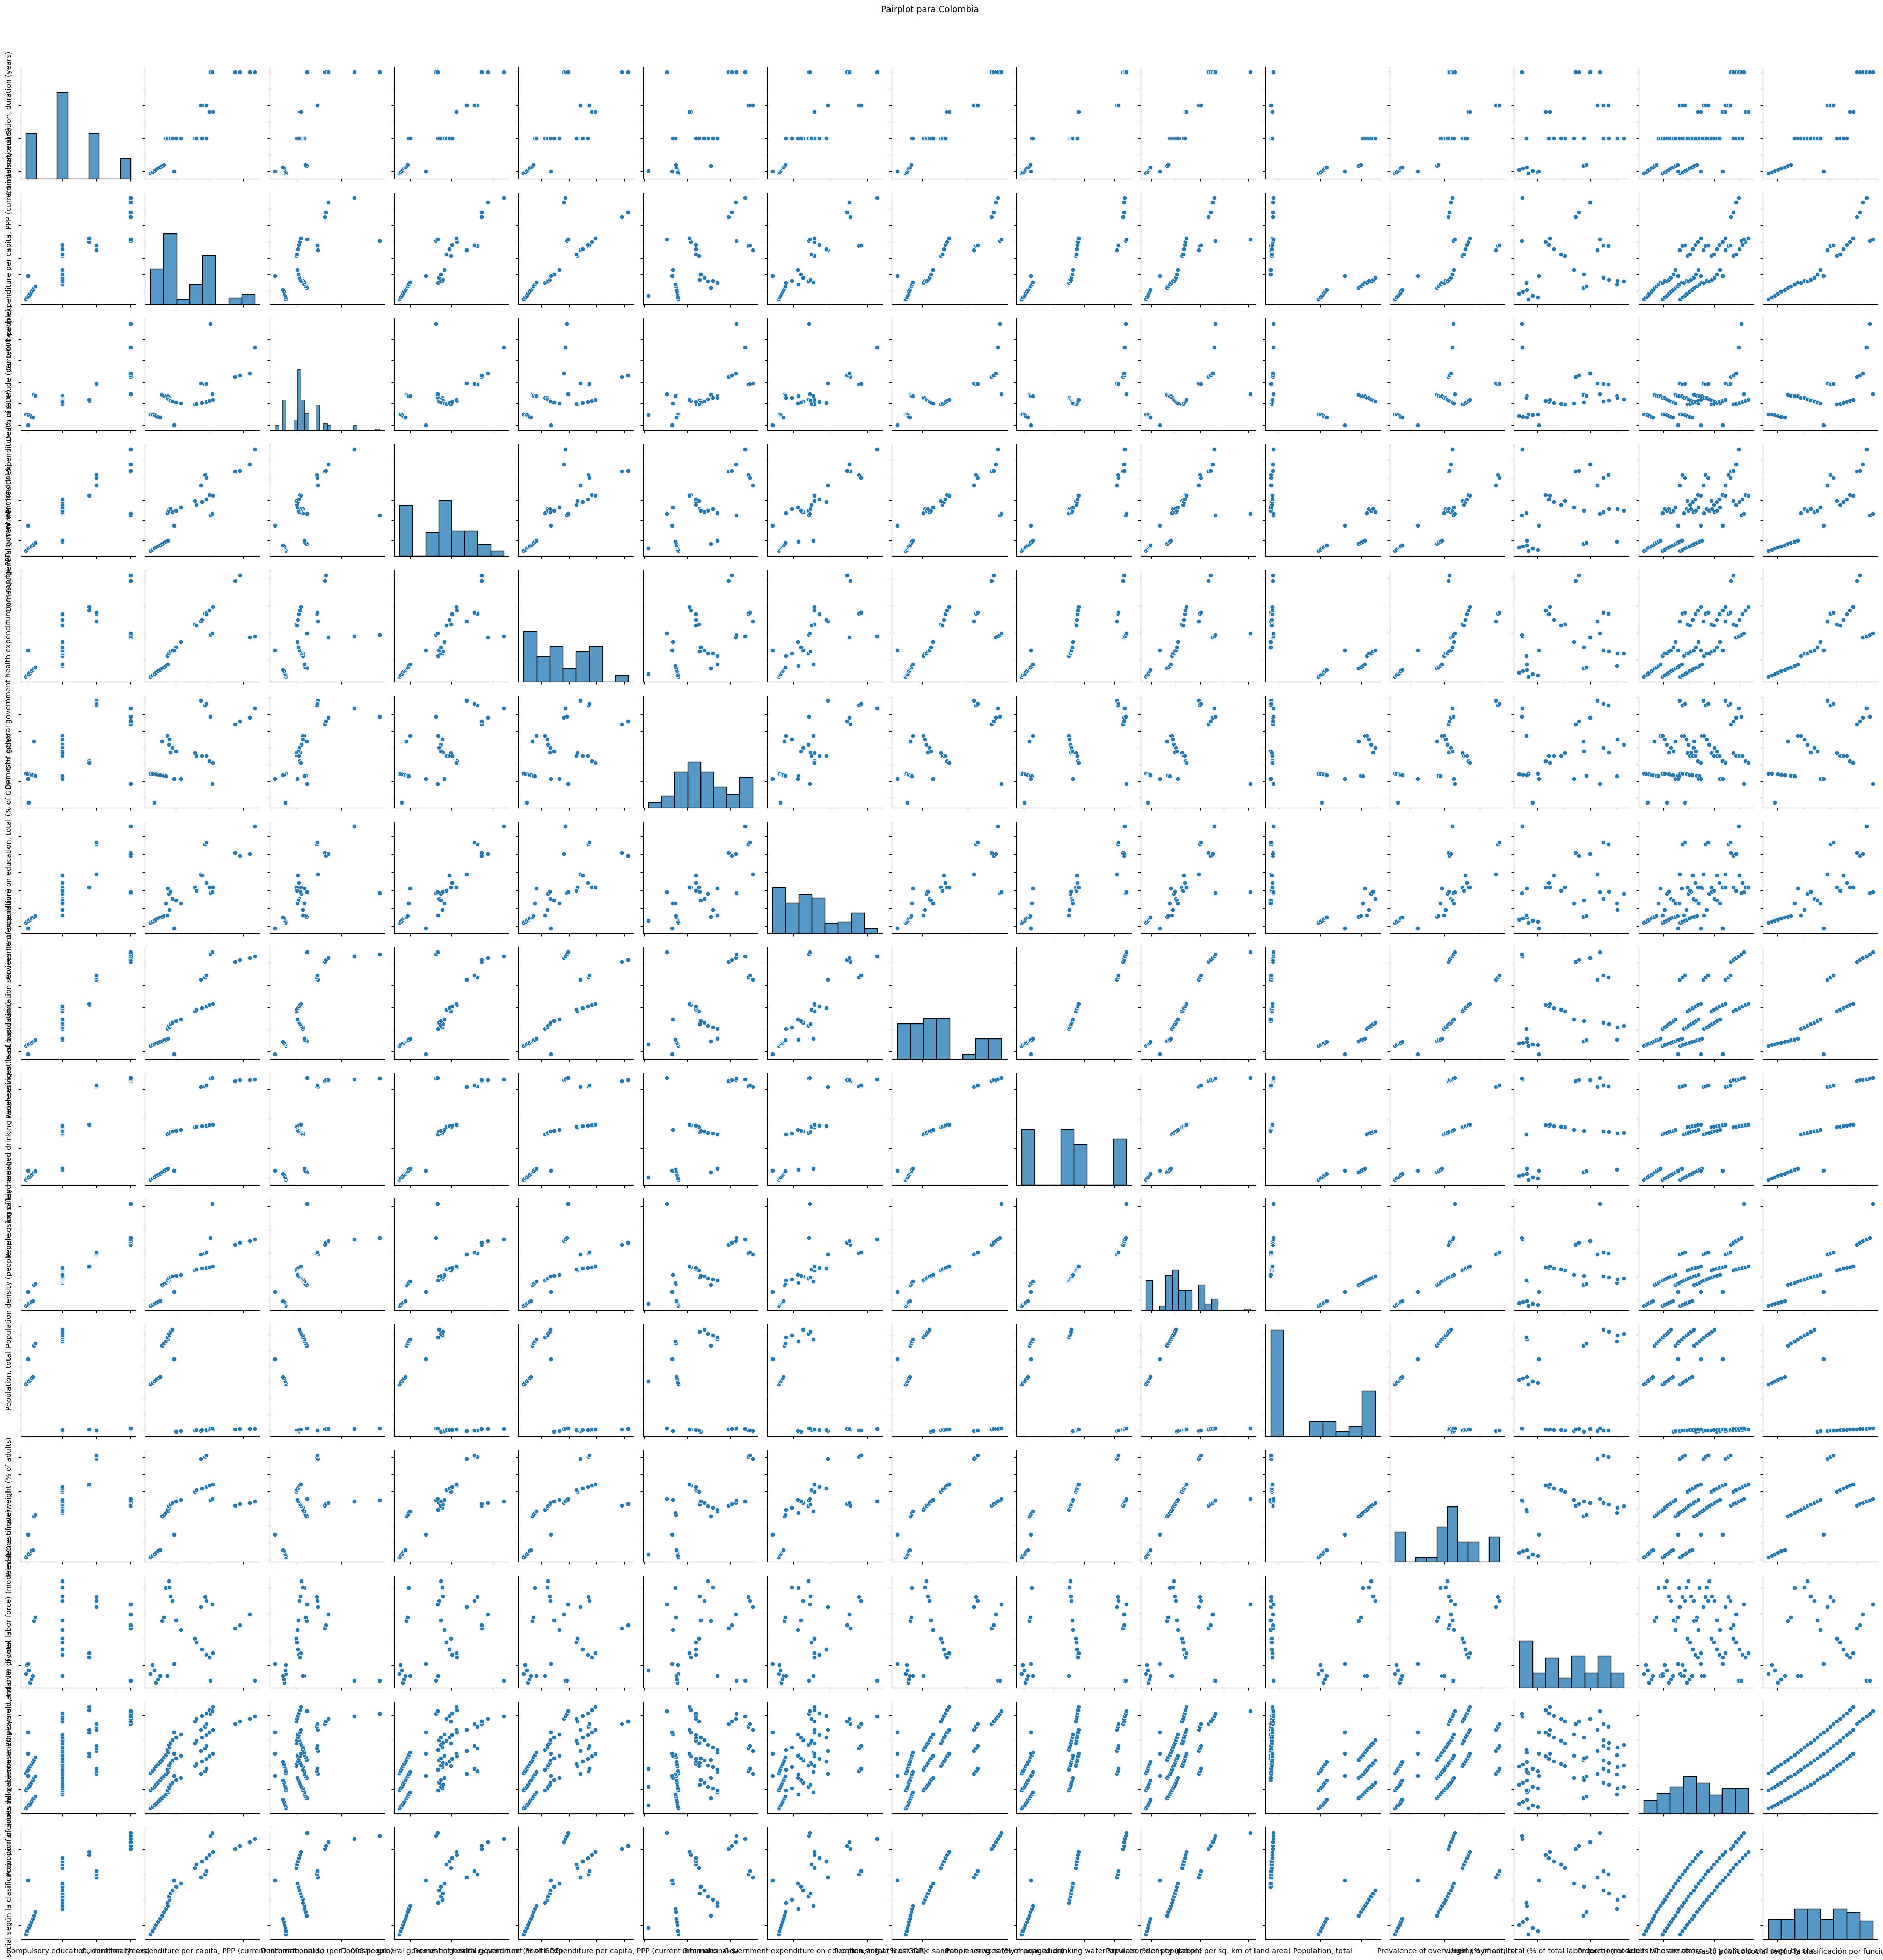

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

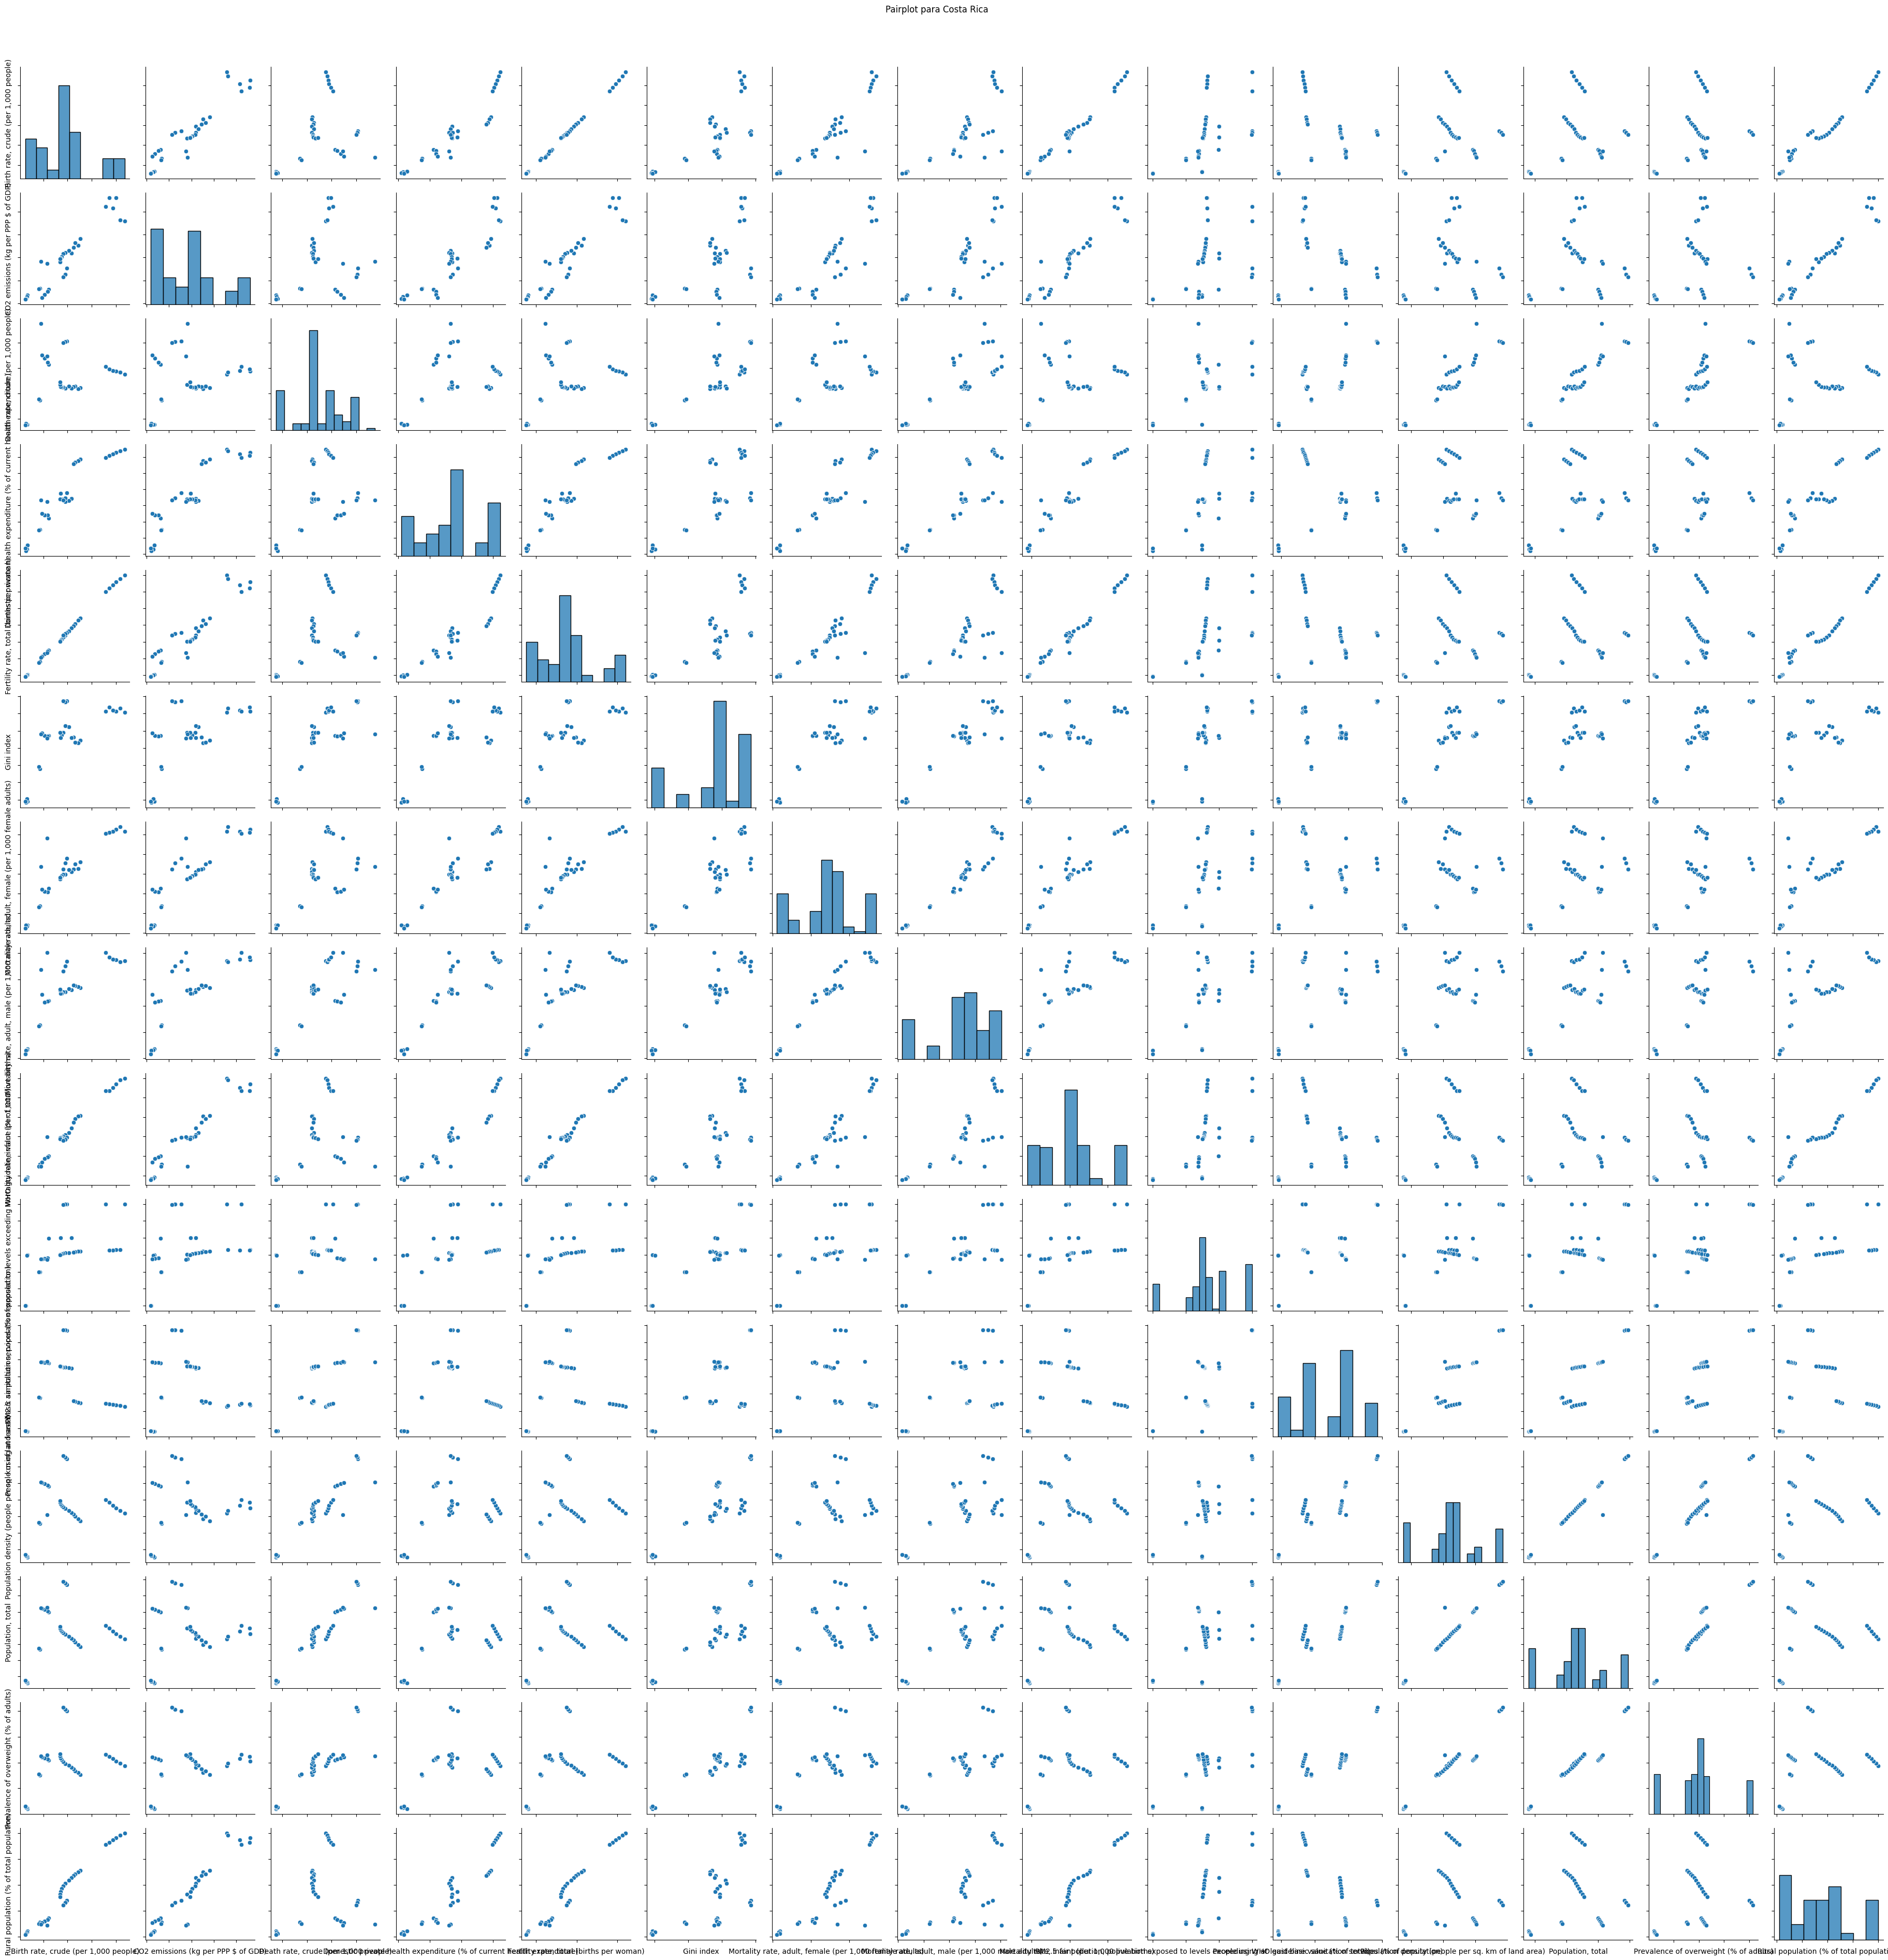

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

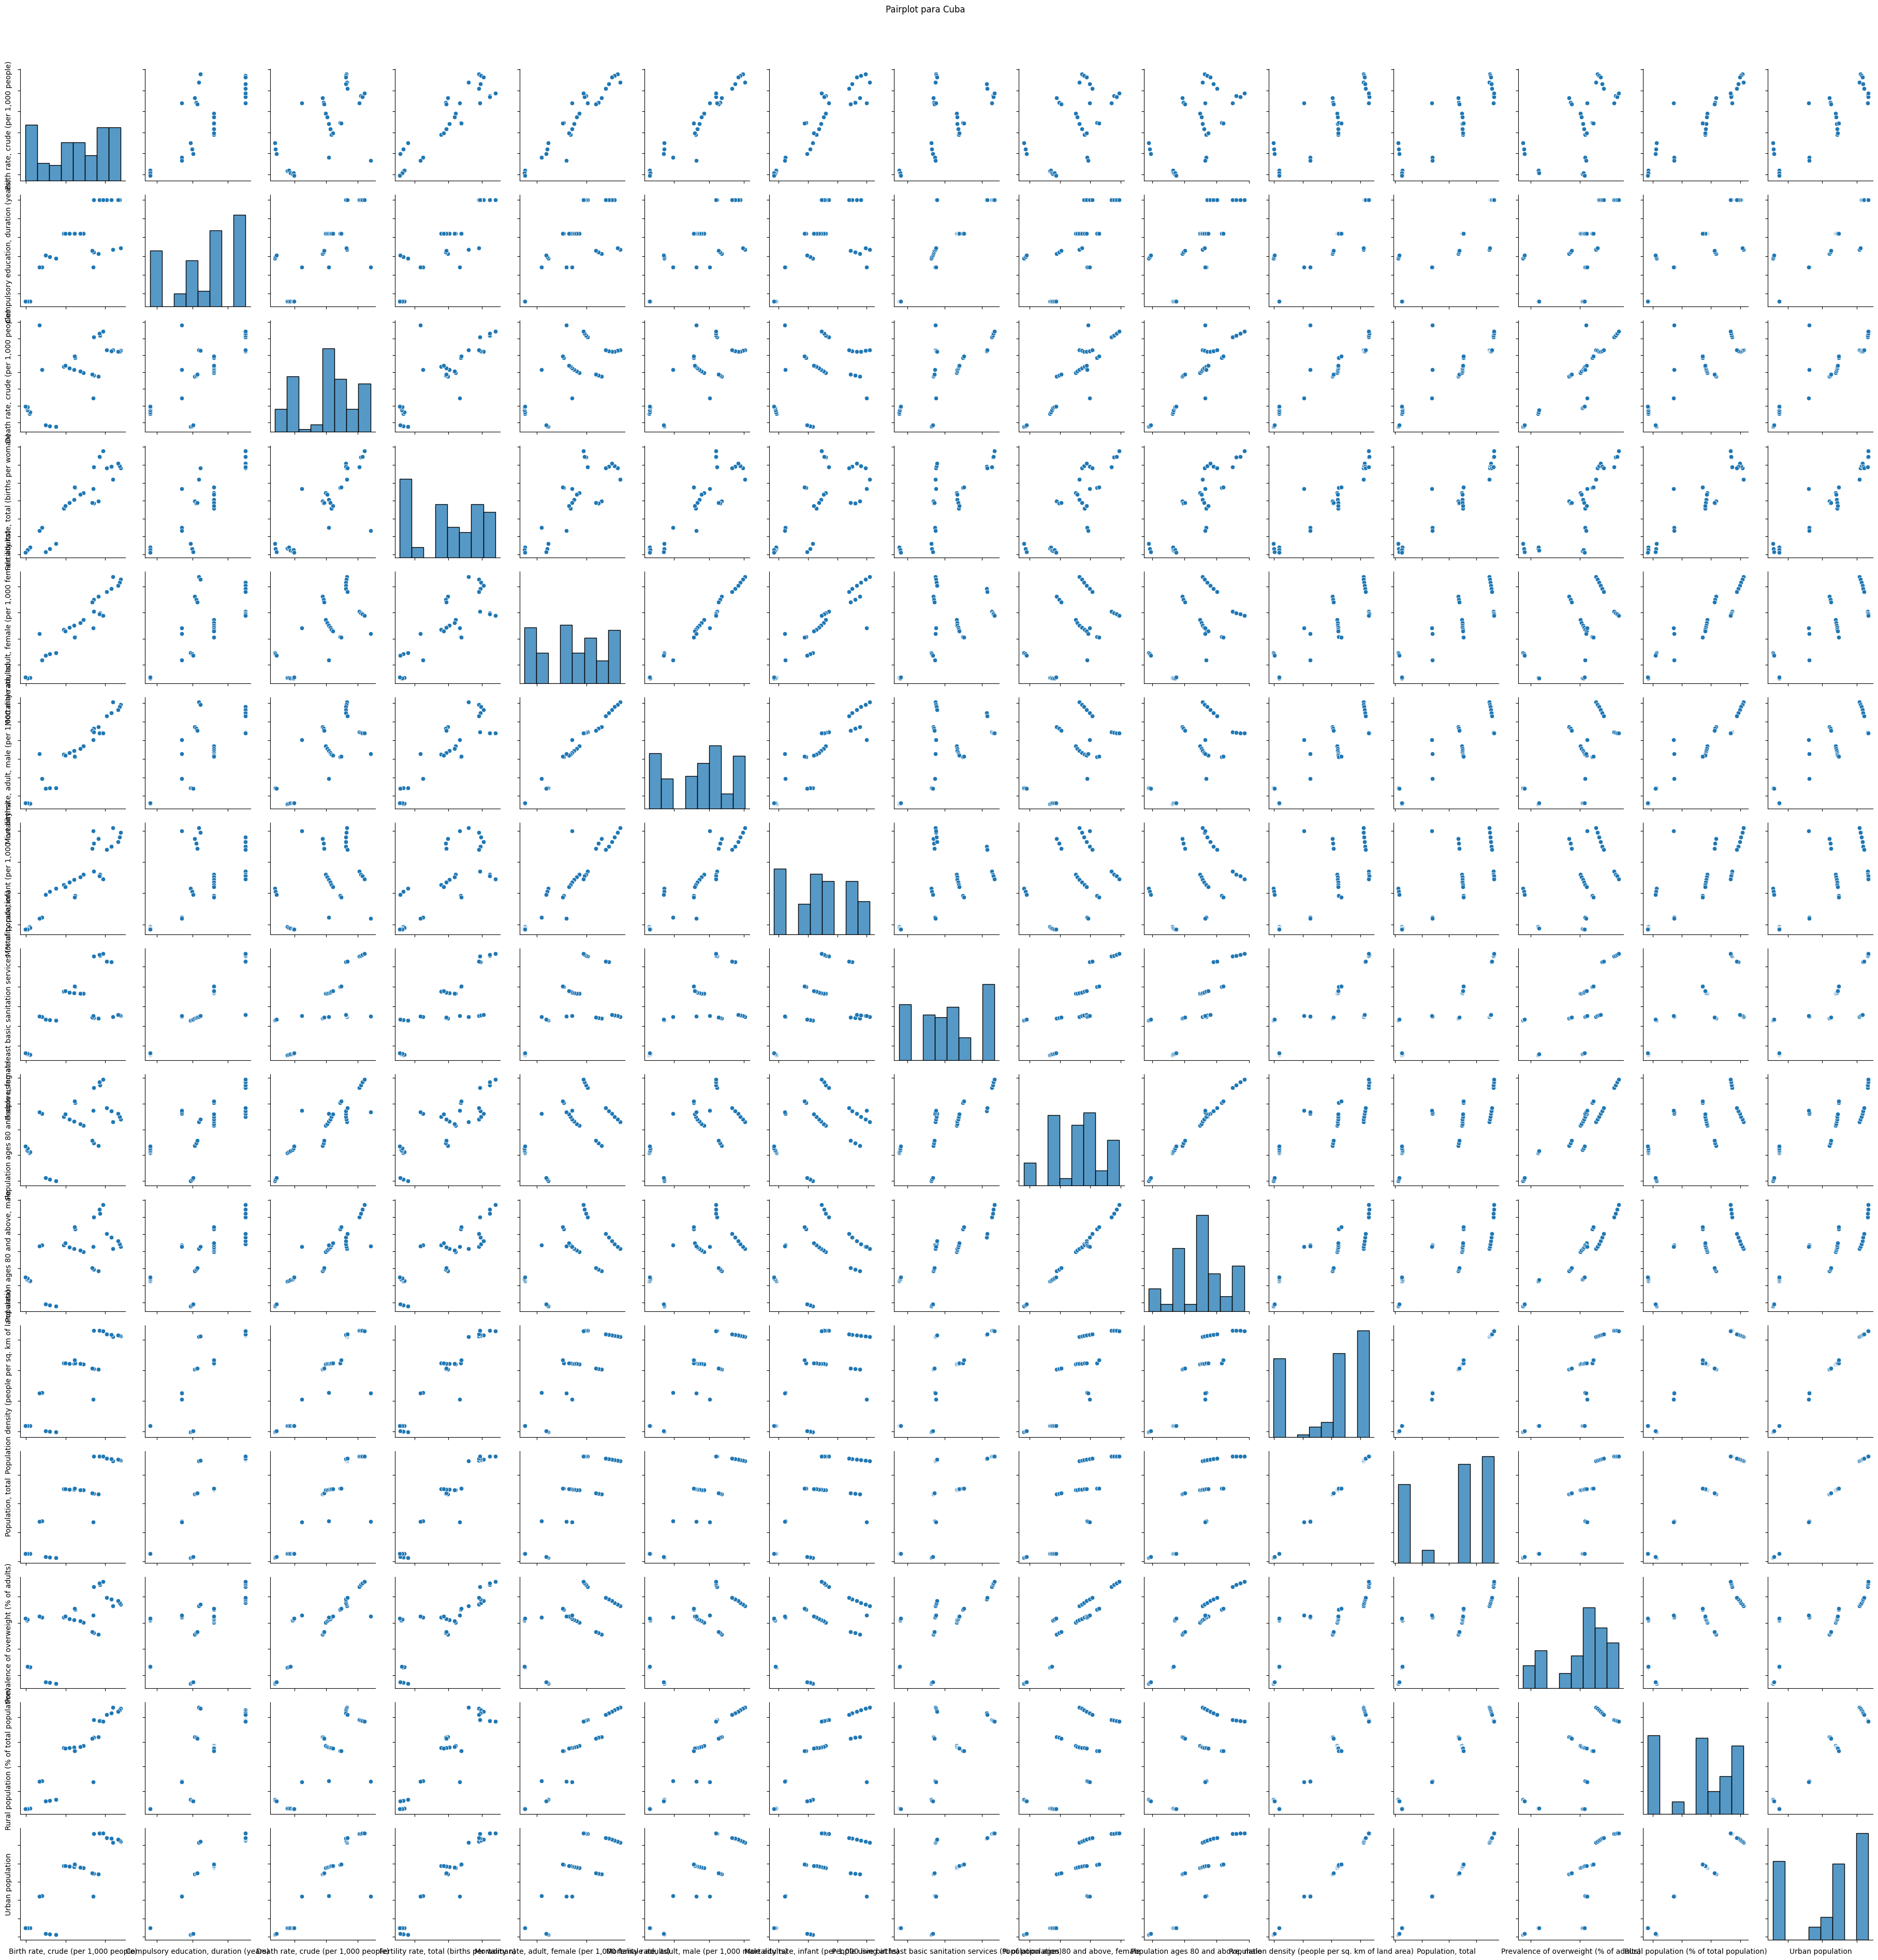

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

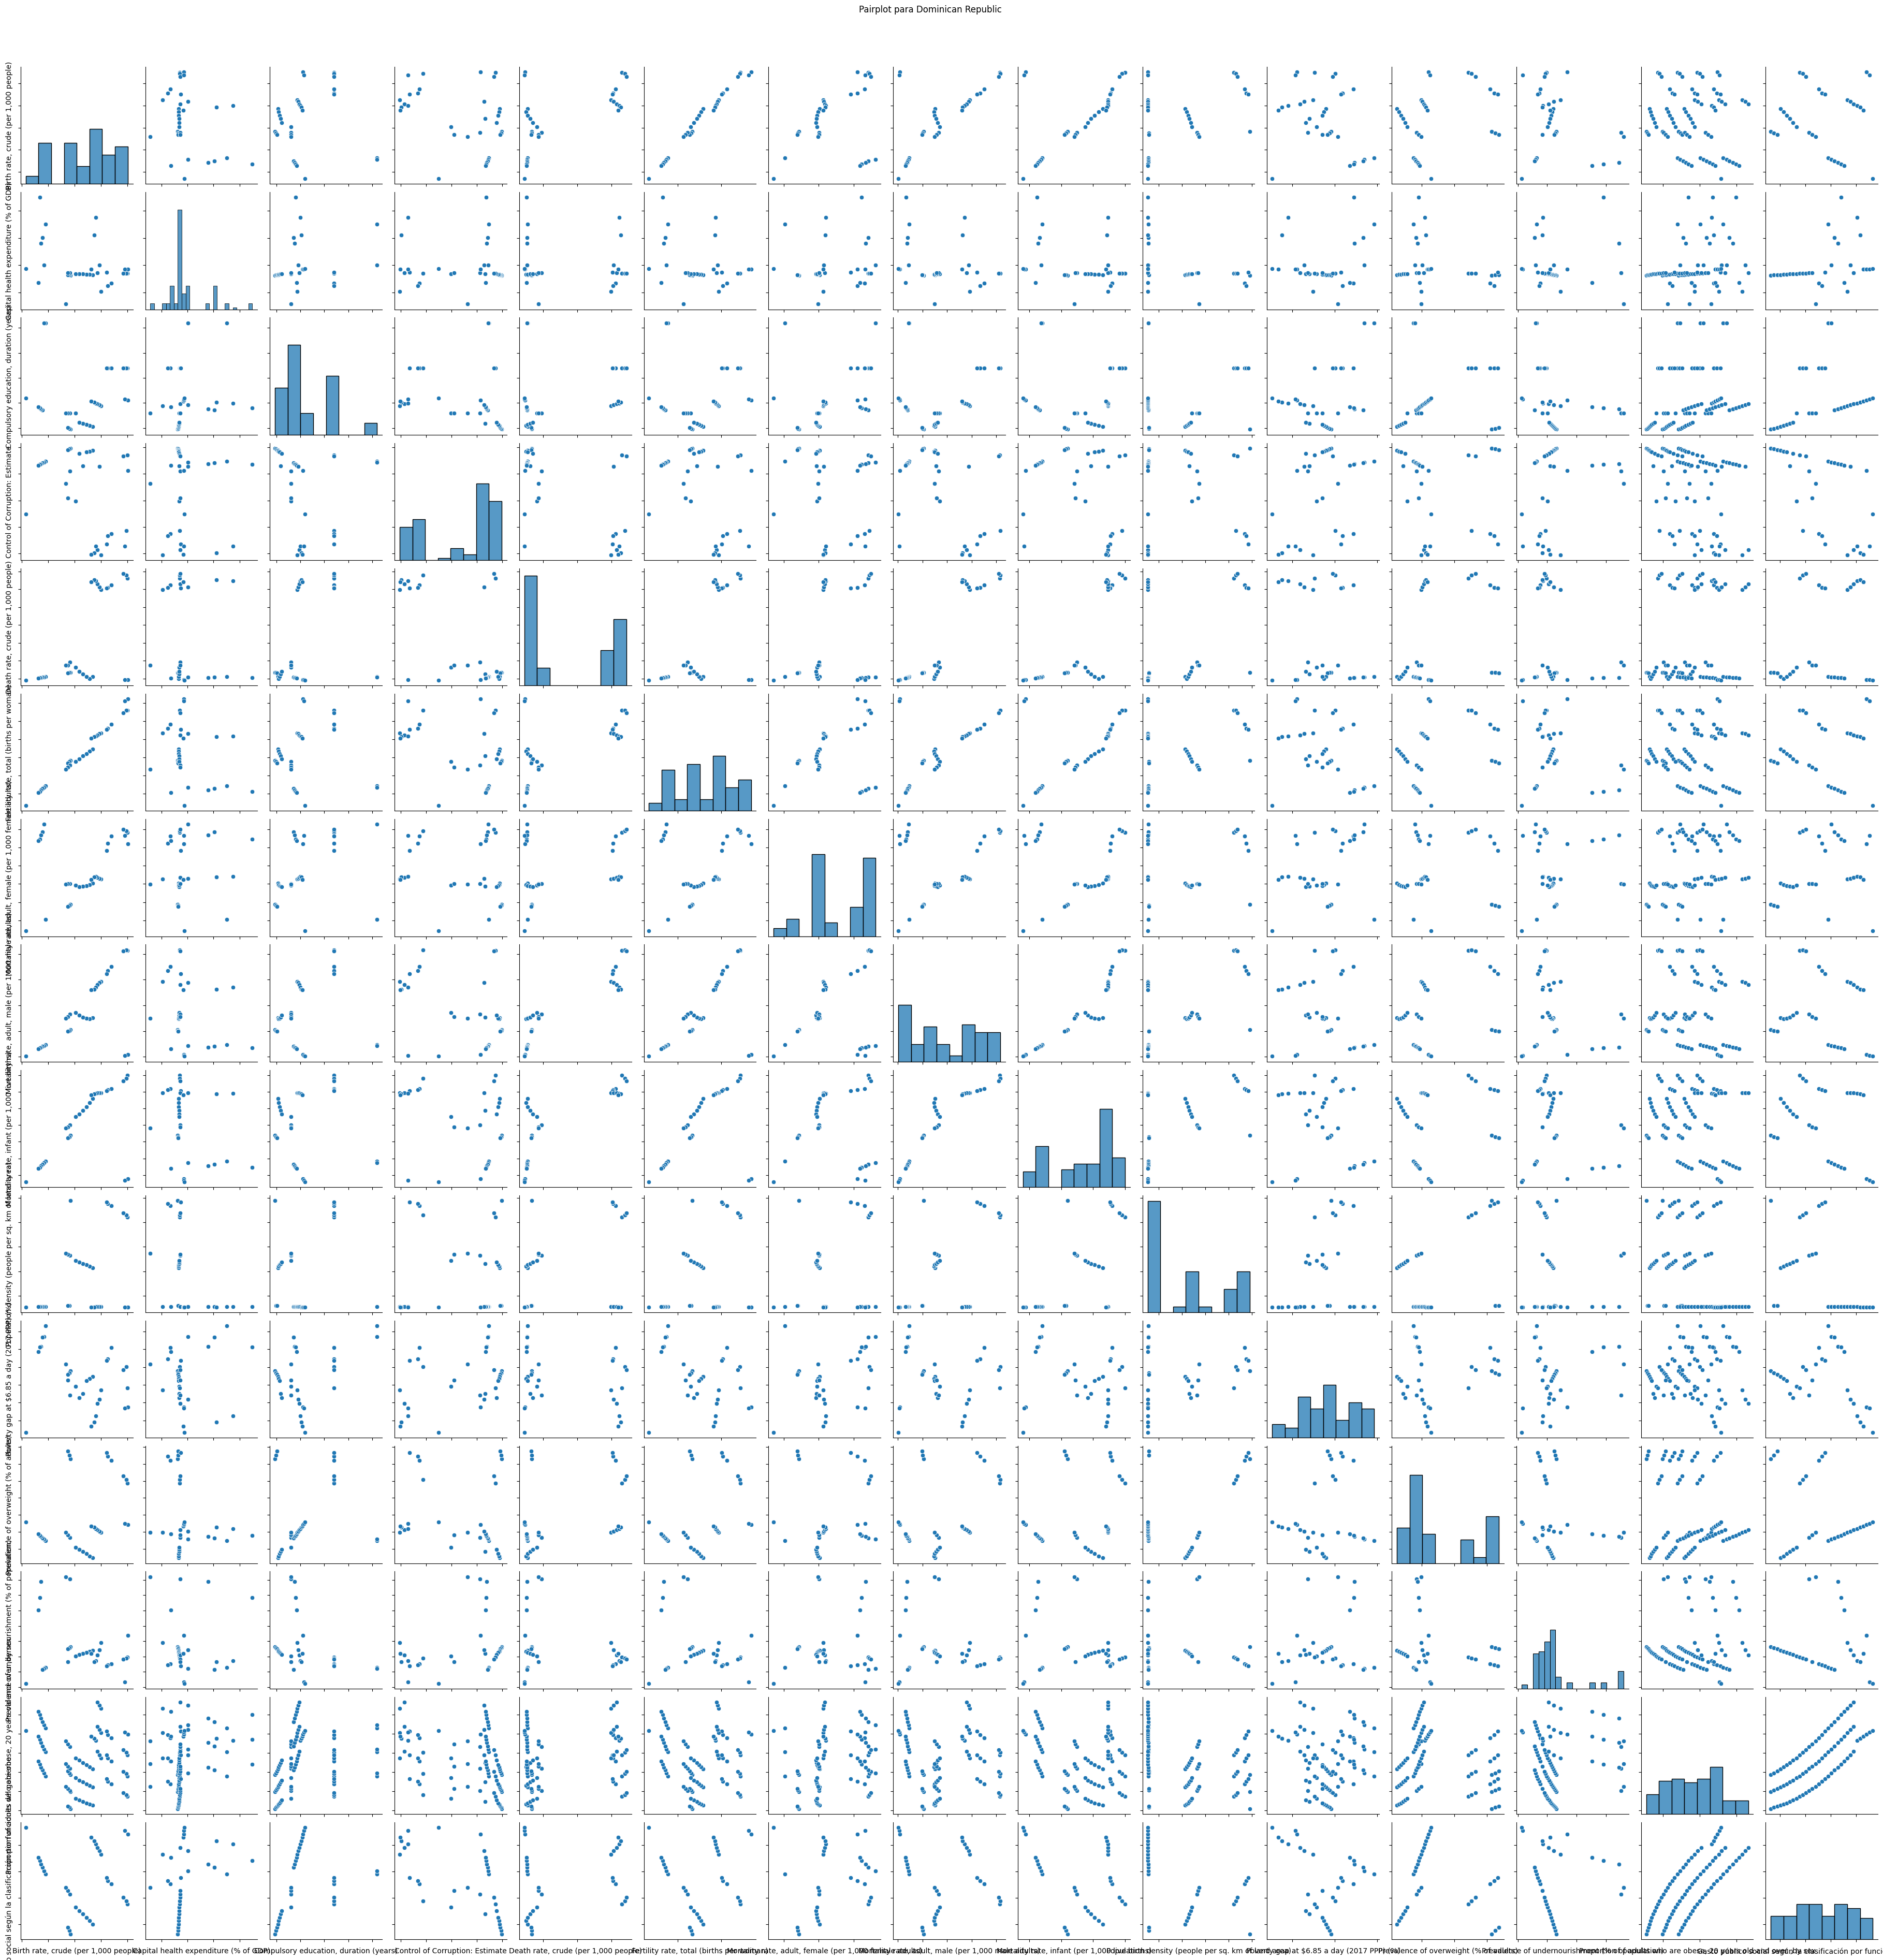

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

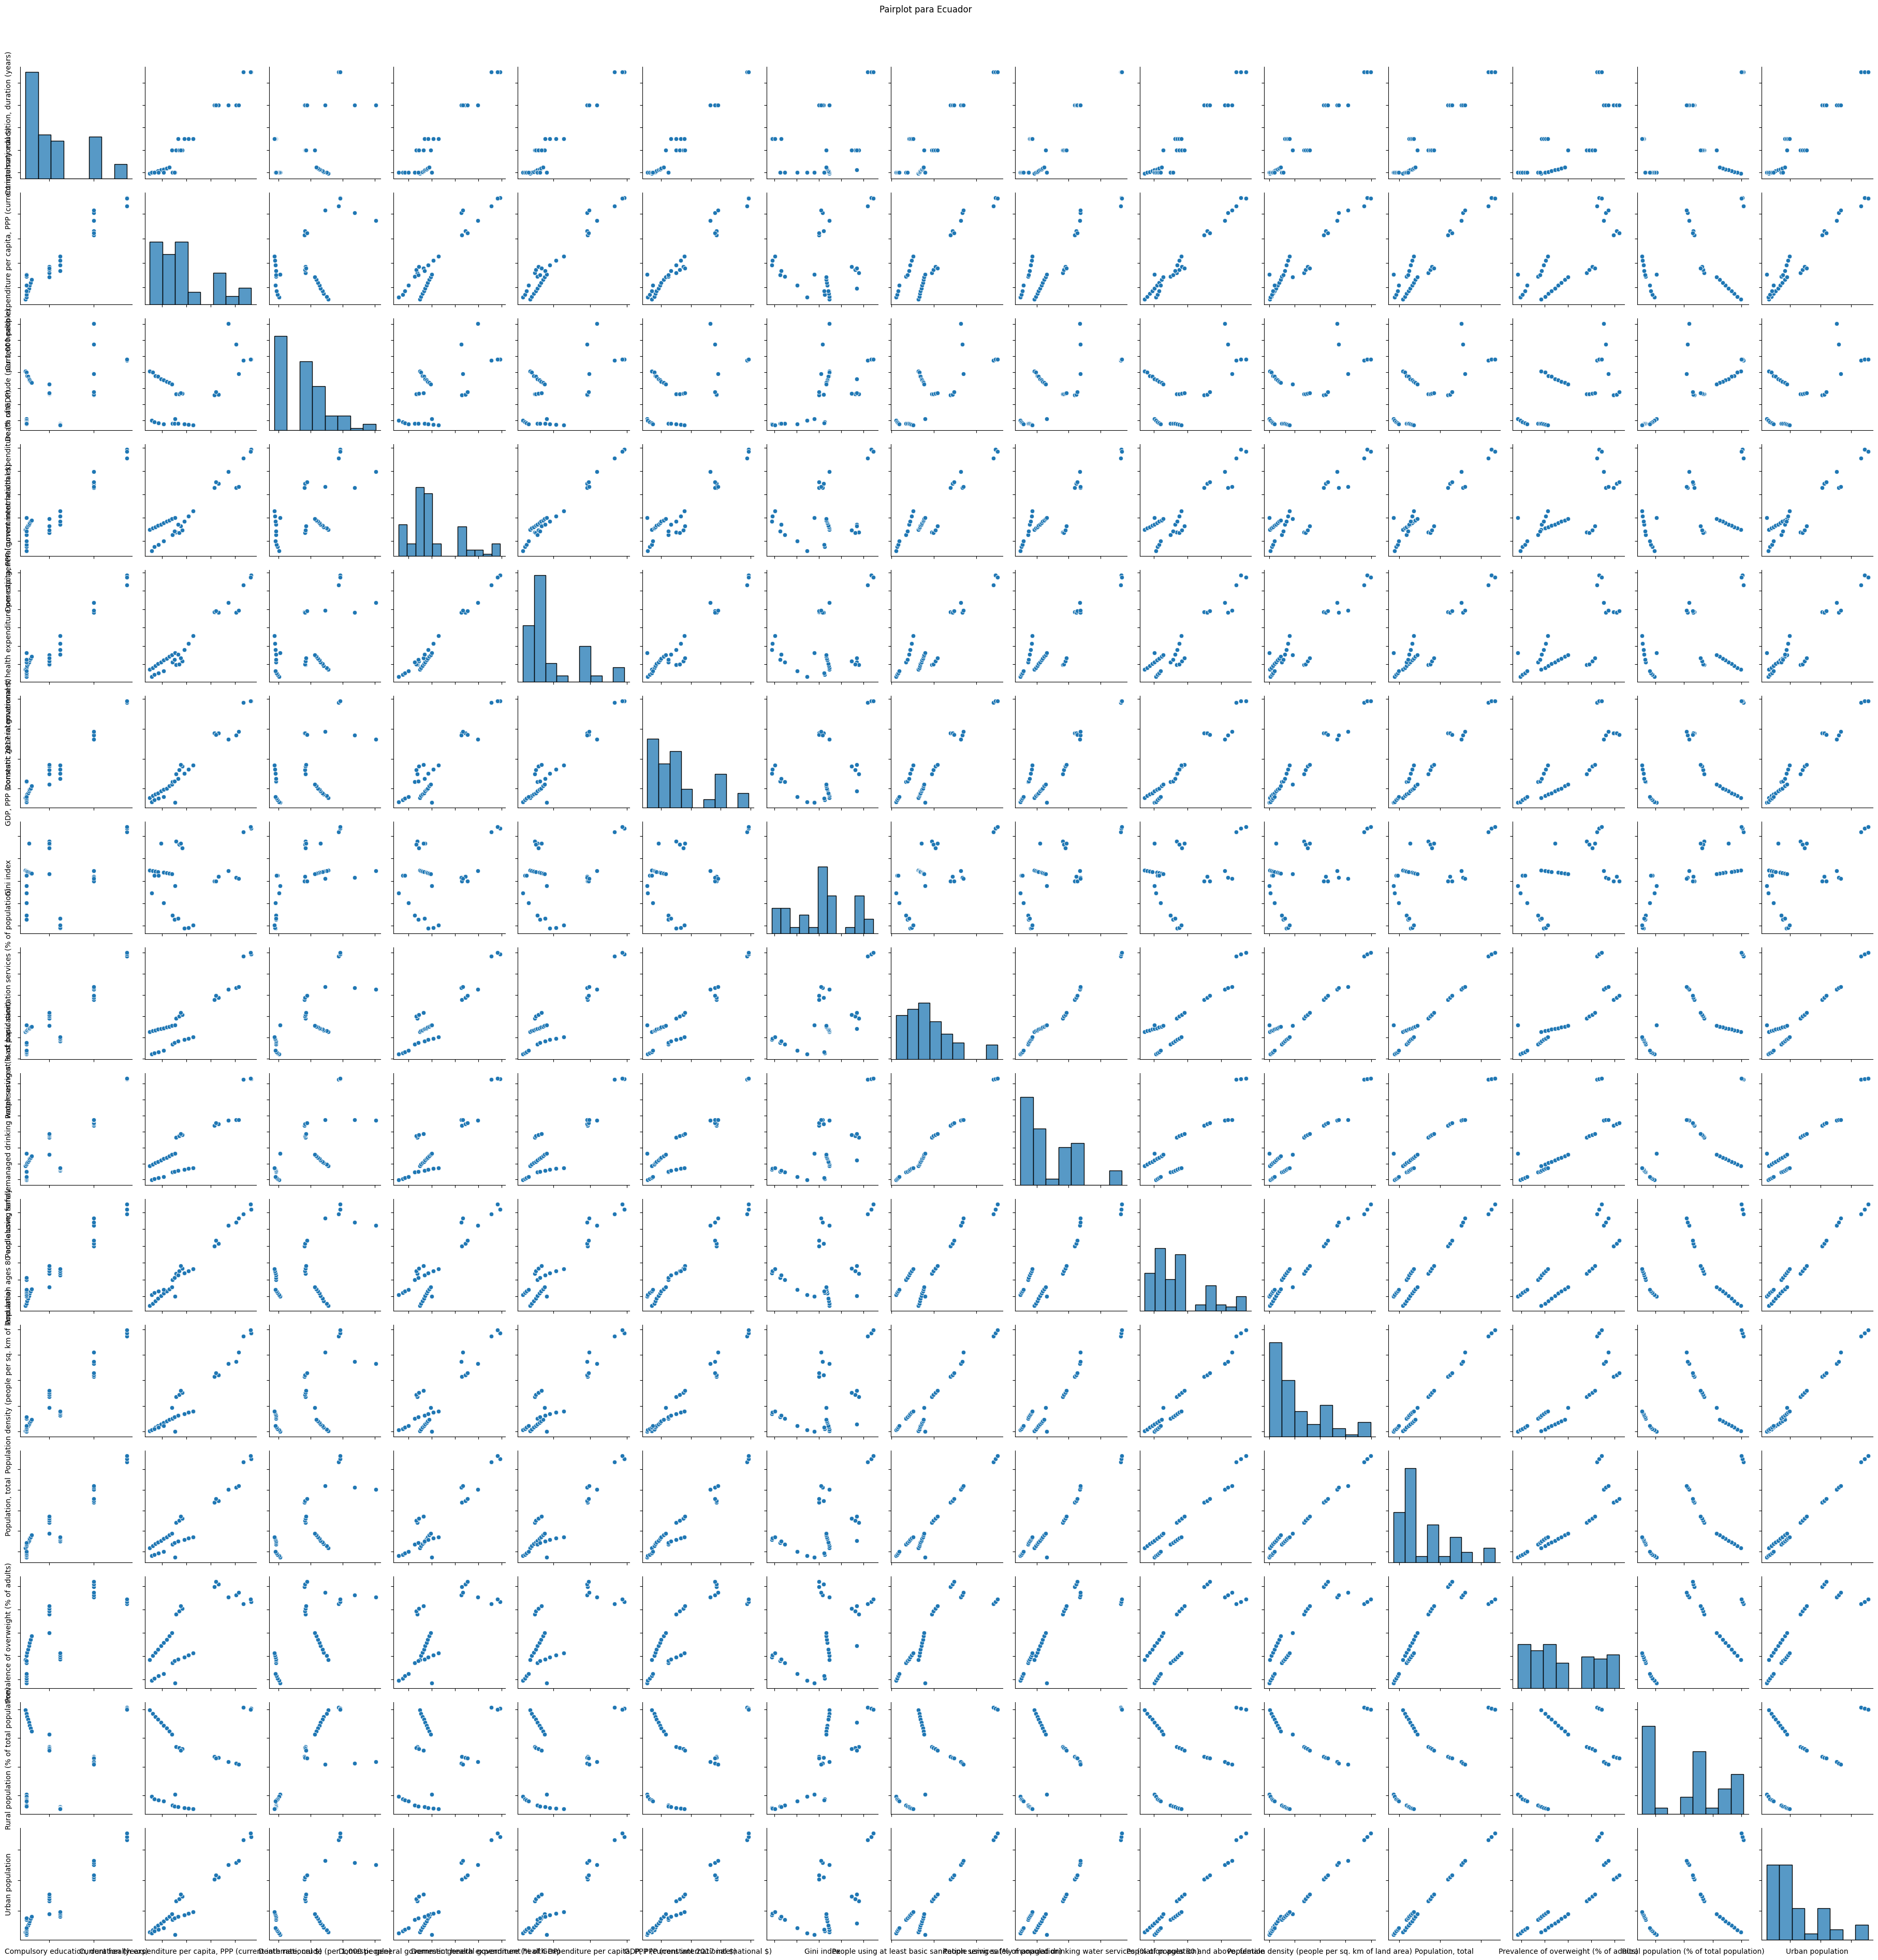

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

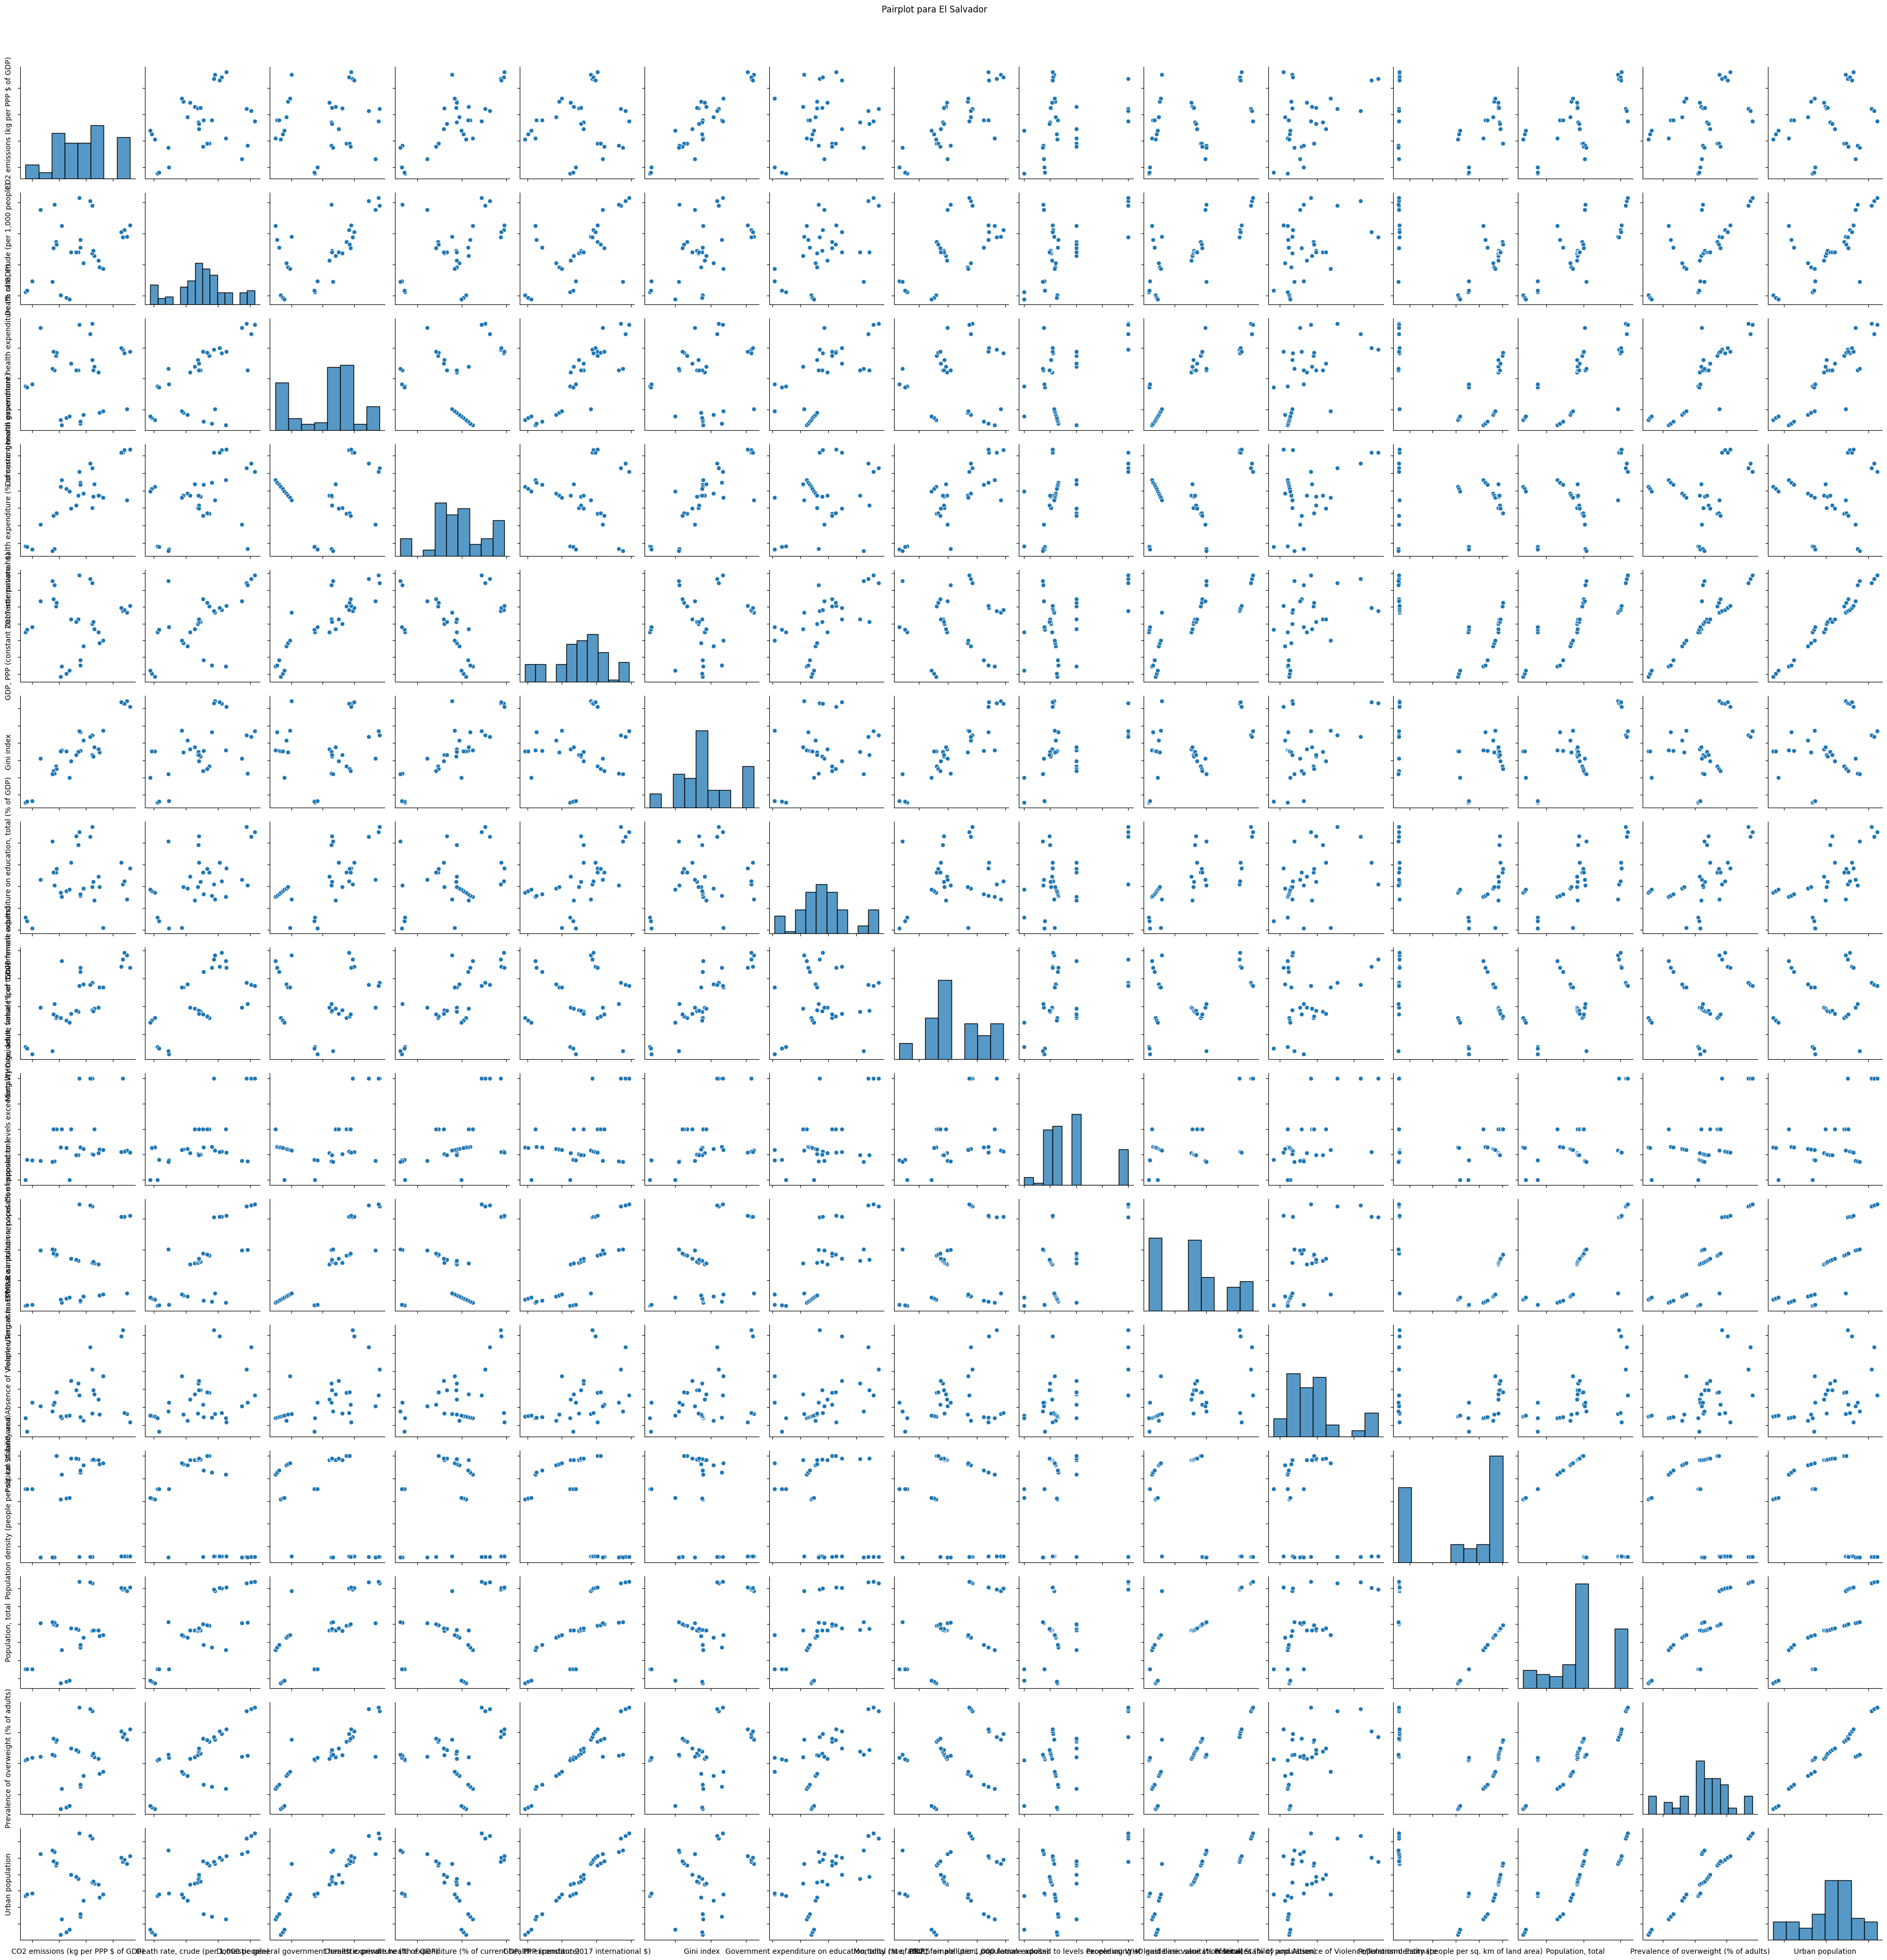

C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
C:\Users\haide\AppData\Local\Temp\ipykernel_11484\2685389892.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), rotation

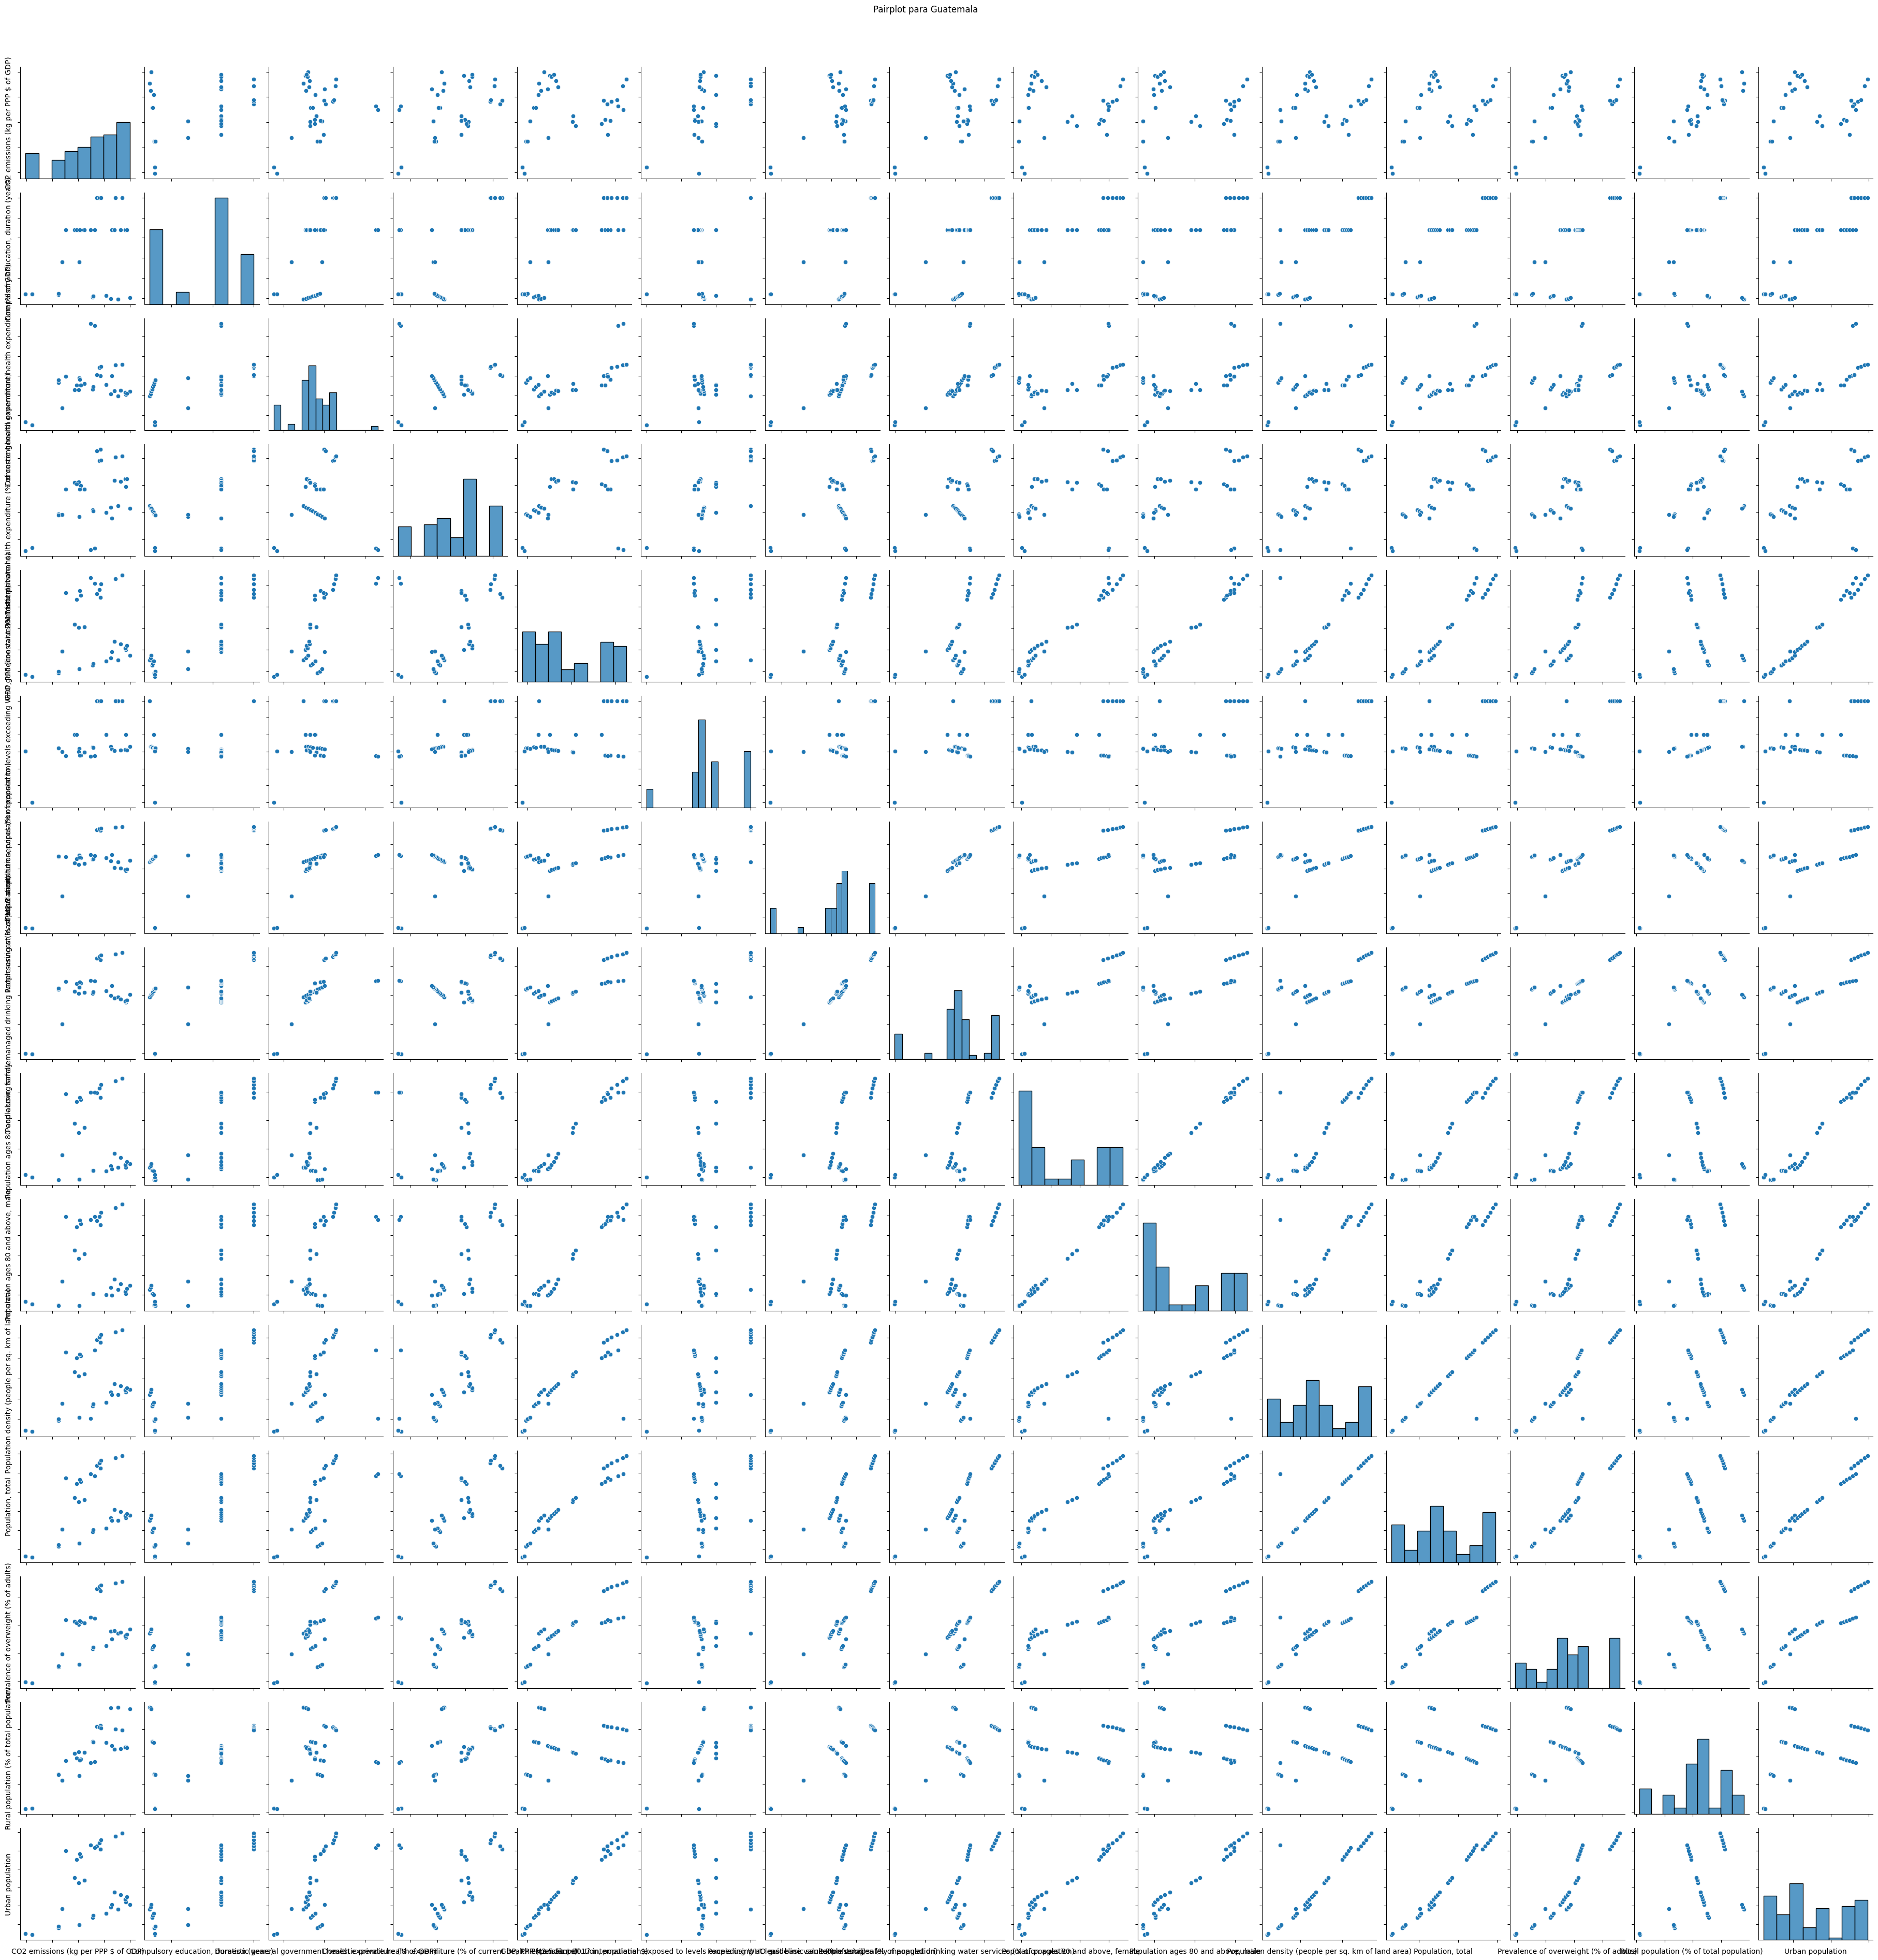

KeyboardInterrupt: 

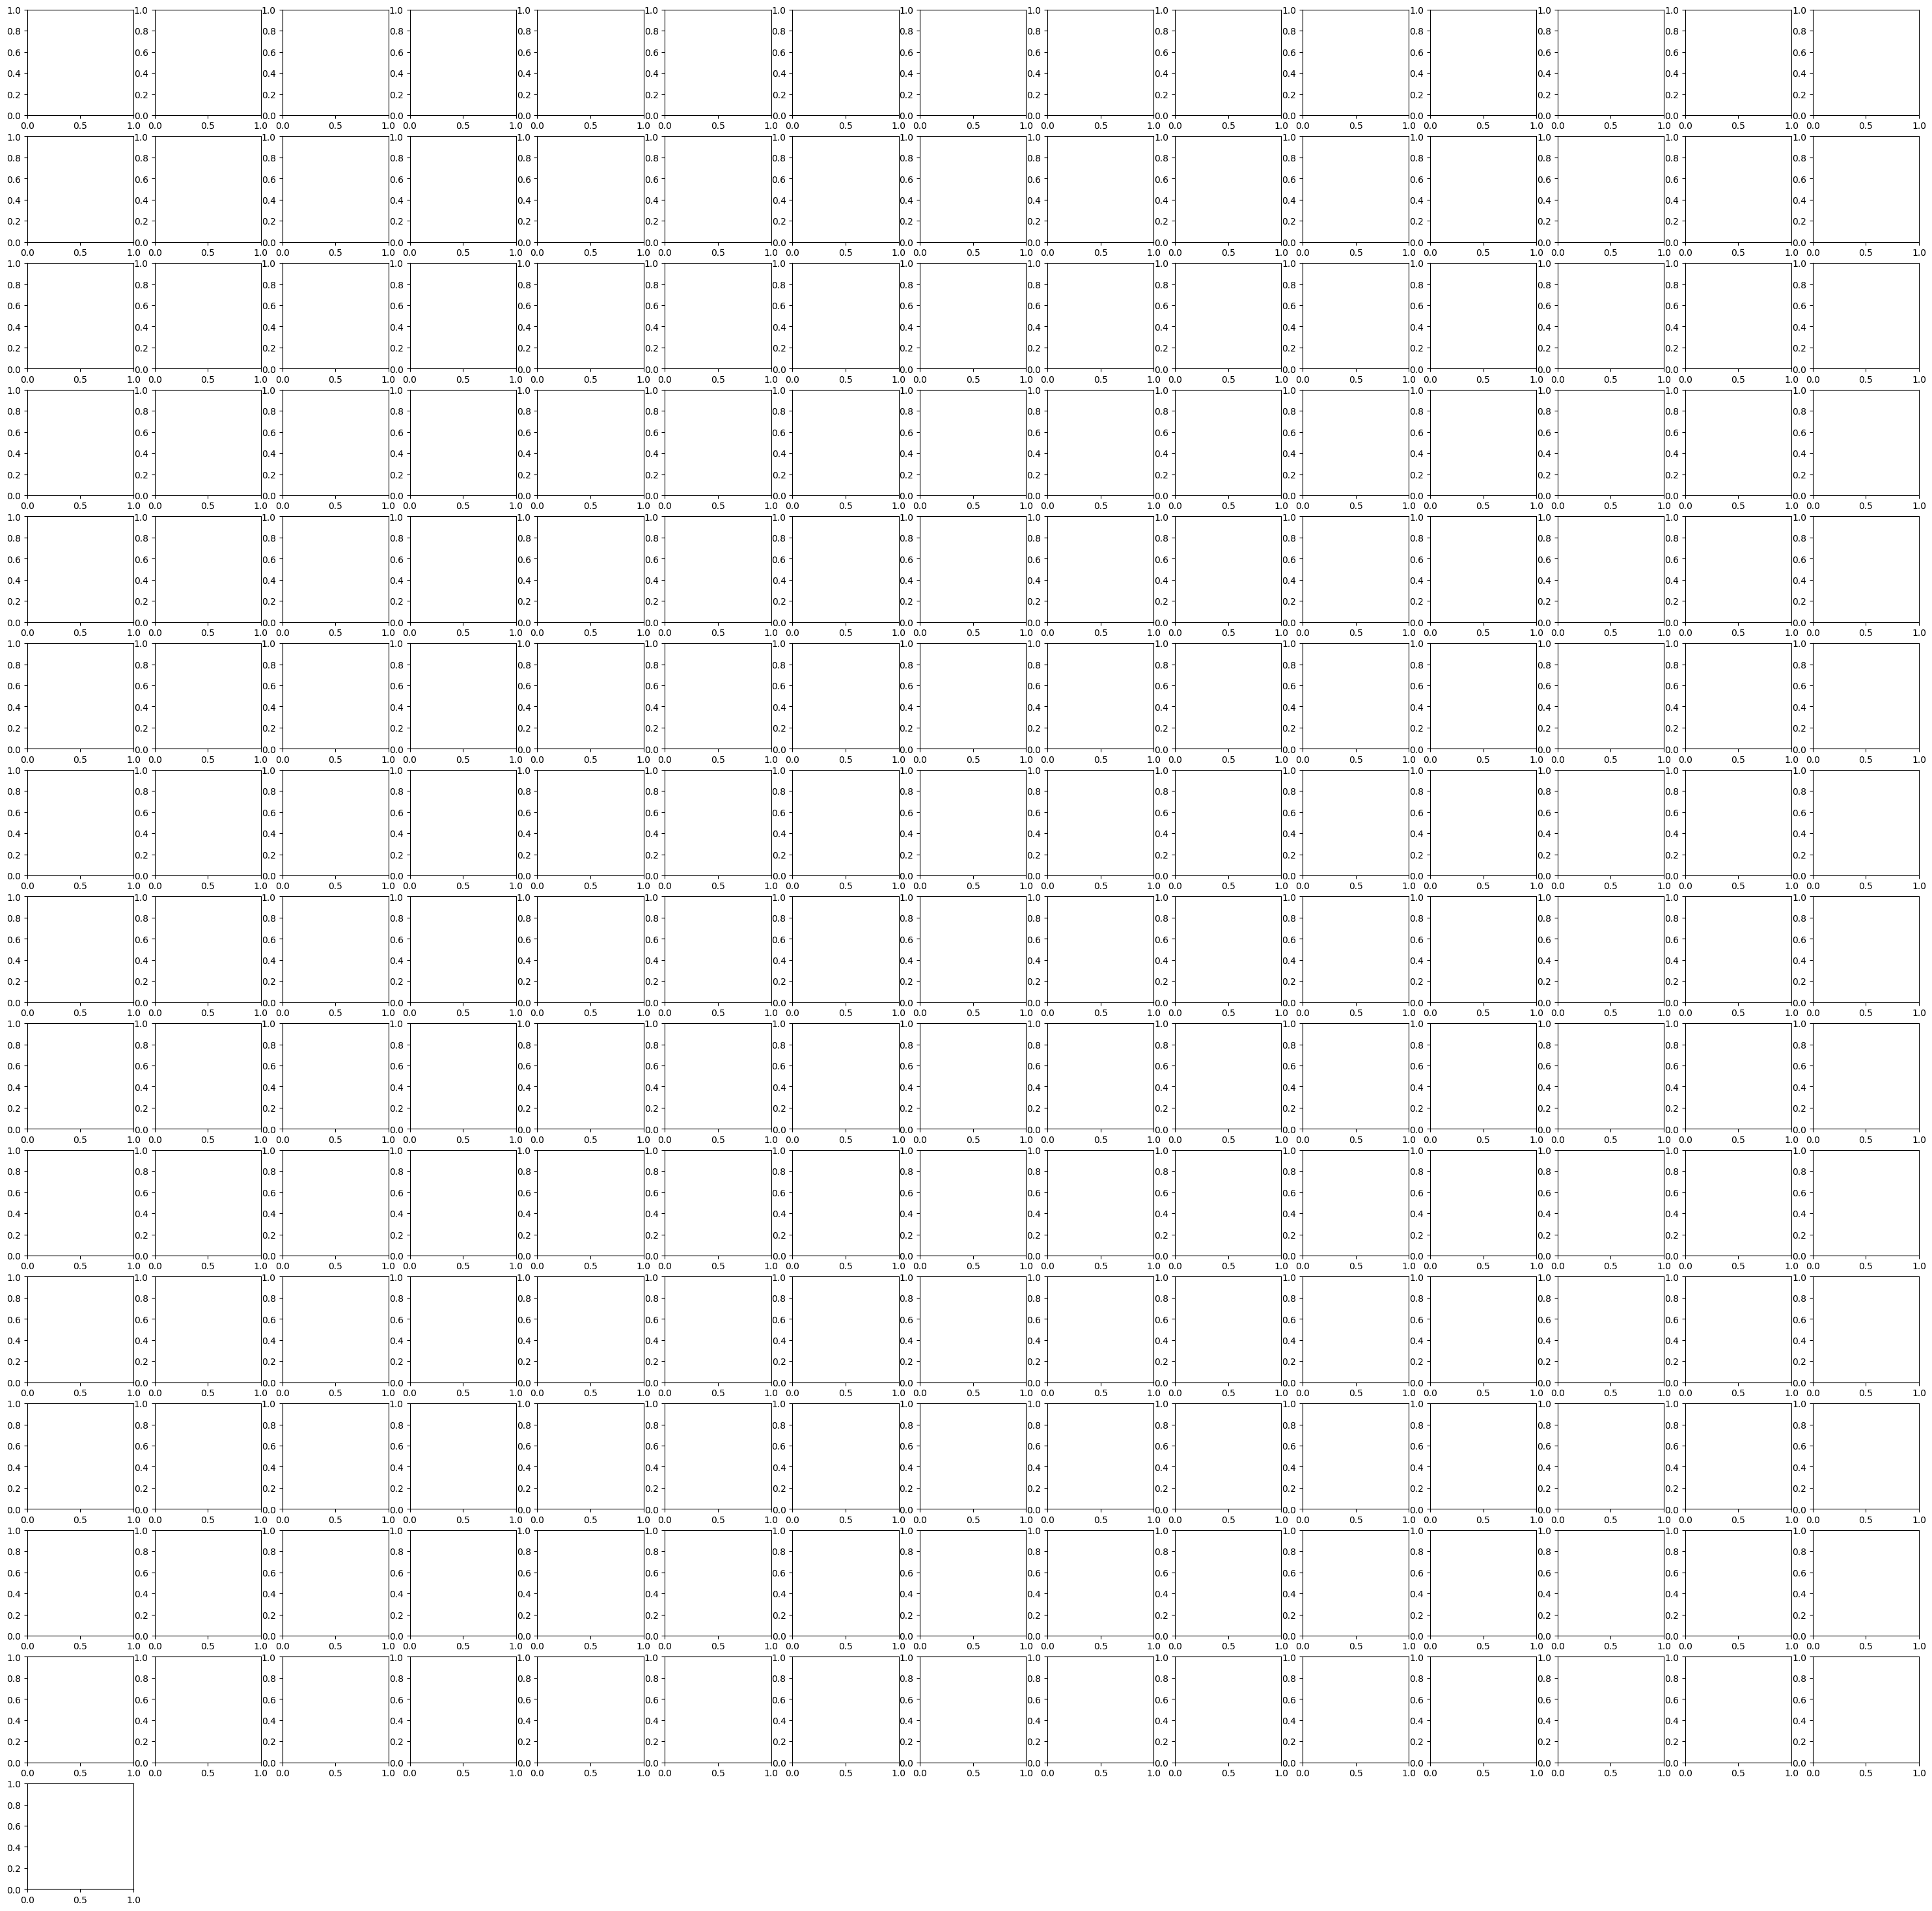

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de países únicos en tus DataFrames
paises = datos_crudos['País'].unique()

# Filtrar y crear un pairplot para cada país
for pais in paises:
    df_crudos_pais = datos_crudos[datos_crudos['País'] == pais]
    df_correlaciones_pais = df_correlaciones[df_correlaciones['País'] == pais]
    
    columnas_coincidentes = df_crudos_pais.columns[df_crudos_pais.columns.isin(df_correlaciones_pais['Indicadores'])]
    df_pais_coincidentes = df_crudos_pais[columnas_coincidentes]
    
    pair_plot = sns.pairplot(df_pais_coincidentes)
    
    for ax in pair_plot.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    
    plt.suptitle(f'Pairplot para {pais}', y=1.02)  # Establecer el título con el nombre del país
    plt.show()
